In [ ]:
import pickle
import joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestRegressor

from sklearn.cluster import KMeans

import copy

from imblearn.over_sampling import SMOTE


%matplotlib inline

In [ ]:
camp = pd.read_csv('/content/Placement_Data_Full_Class.csv')
camp

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1     Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2    Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4    Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
..         ...    ...      ...            ...    ...         ...       ...  
210  Comm&Mgmt     No     91.0        Mkt&Fin  74.49      Placed  400000.0  
211   Sci&Tech     No     74.0        Mkt&Fin  53.62      Placed  275000.0  
212  Comm&Mgmt    Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
213  Comm&Mgmt     No     70.0         Mkt&HR  60.23      Placed  204000.0  
214  Comm&Mgmt     No     89.0         Mkt&HR  60.22  Not Placed       NaN  

[215 rows x 15 columns]

In [ ]:
camp

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1     Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2    Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4    Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
..         ...    ...      ...            ...    ...         ...       ...  
210  Comm&Mgmt     No     91.0        Mkt&Fin  74.49      Placed  400000.0  
211   Sci&Tech     No     74.0        Mkt&Fin  53.62      Placed  275000.0  
212  Comm&Mgmt    Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
213  Comm&Mgmt     No     70.0         Mkt&HR  60.23      Placed  204000.0  
214  Comm&Mgmt     No     89.0         Mkt&HR  60.22  Not Placed       NaN  

[215 rows x 15 columns]

In [ ]:
engg = pd.read_csv('/content/collegePlace.csv')
engg

Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22    Male  Electronics And Communication            1     8       1   
1      21  Female               Computer Science            0     7       1   
2      22  Female         Information Technology            1     6       0   
3      21    Male         Information Technology            0     8       0   
4      22    Male                     Mechanical            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2961   23    Male         Information Technology            0     7       0   
2962   23    Male                     Mechanical            1     7       1   
2963   22    Male         Information Technology            1     7       0   
2964   22    Male               Computer Science            1     7       0   
2965   23    Male                          Civil            0     8       0   

      HistoryOfBacklogs  PlacedOrNot  
0                     1            1  
1                     1            1  
2                     0            1  
3                     1            1  
4                     0            1  
...                 ...          ...  
2961                  0            0  
2962                  0            0  
2963                  0            0  
2964                  0            0  
2965                  0            1  

[2966 rows x 8 columns]

In [ ]:
camp.describe()

sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000

In [ ]:
engg.describe()

Age  Internships         CGPA       Hostel  HistoryOfBacklogs  \
count  2966.000000  2966.000000  2966.000000  2966.000000        2966.000000   
mean     21.485840     0.703641     7.073837     0.269049           0.192178   
std       1.324933     0.740197     0.967748     0.443540           0.394079   
min      19.000000     0.000000     5.000000     0.000000           0.000000   
25%      21.000000     0.000000     6.000000     0.000000           0.000000   
50%      21.000000     1.000000     7.000000     0.000000           0.000000   
75%      22.000000     1.000000     8.000000     1.000000           0.000000   
max      30.000000     3.000000     9.000000     1.000000           1.000000   

       PlacedOrNot  
count  2966.000000  
mean      0.552596  
std       0.497310  
min       0.000000  
25%       0.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

In [ ]:
camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
camp.drop('sl_no',axis=1,inplace=True)

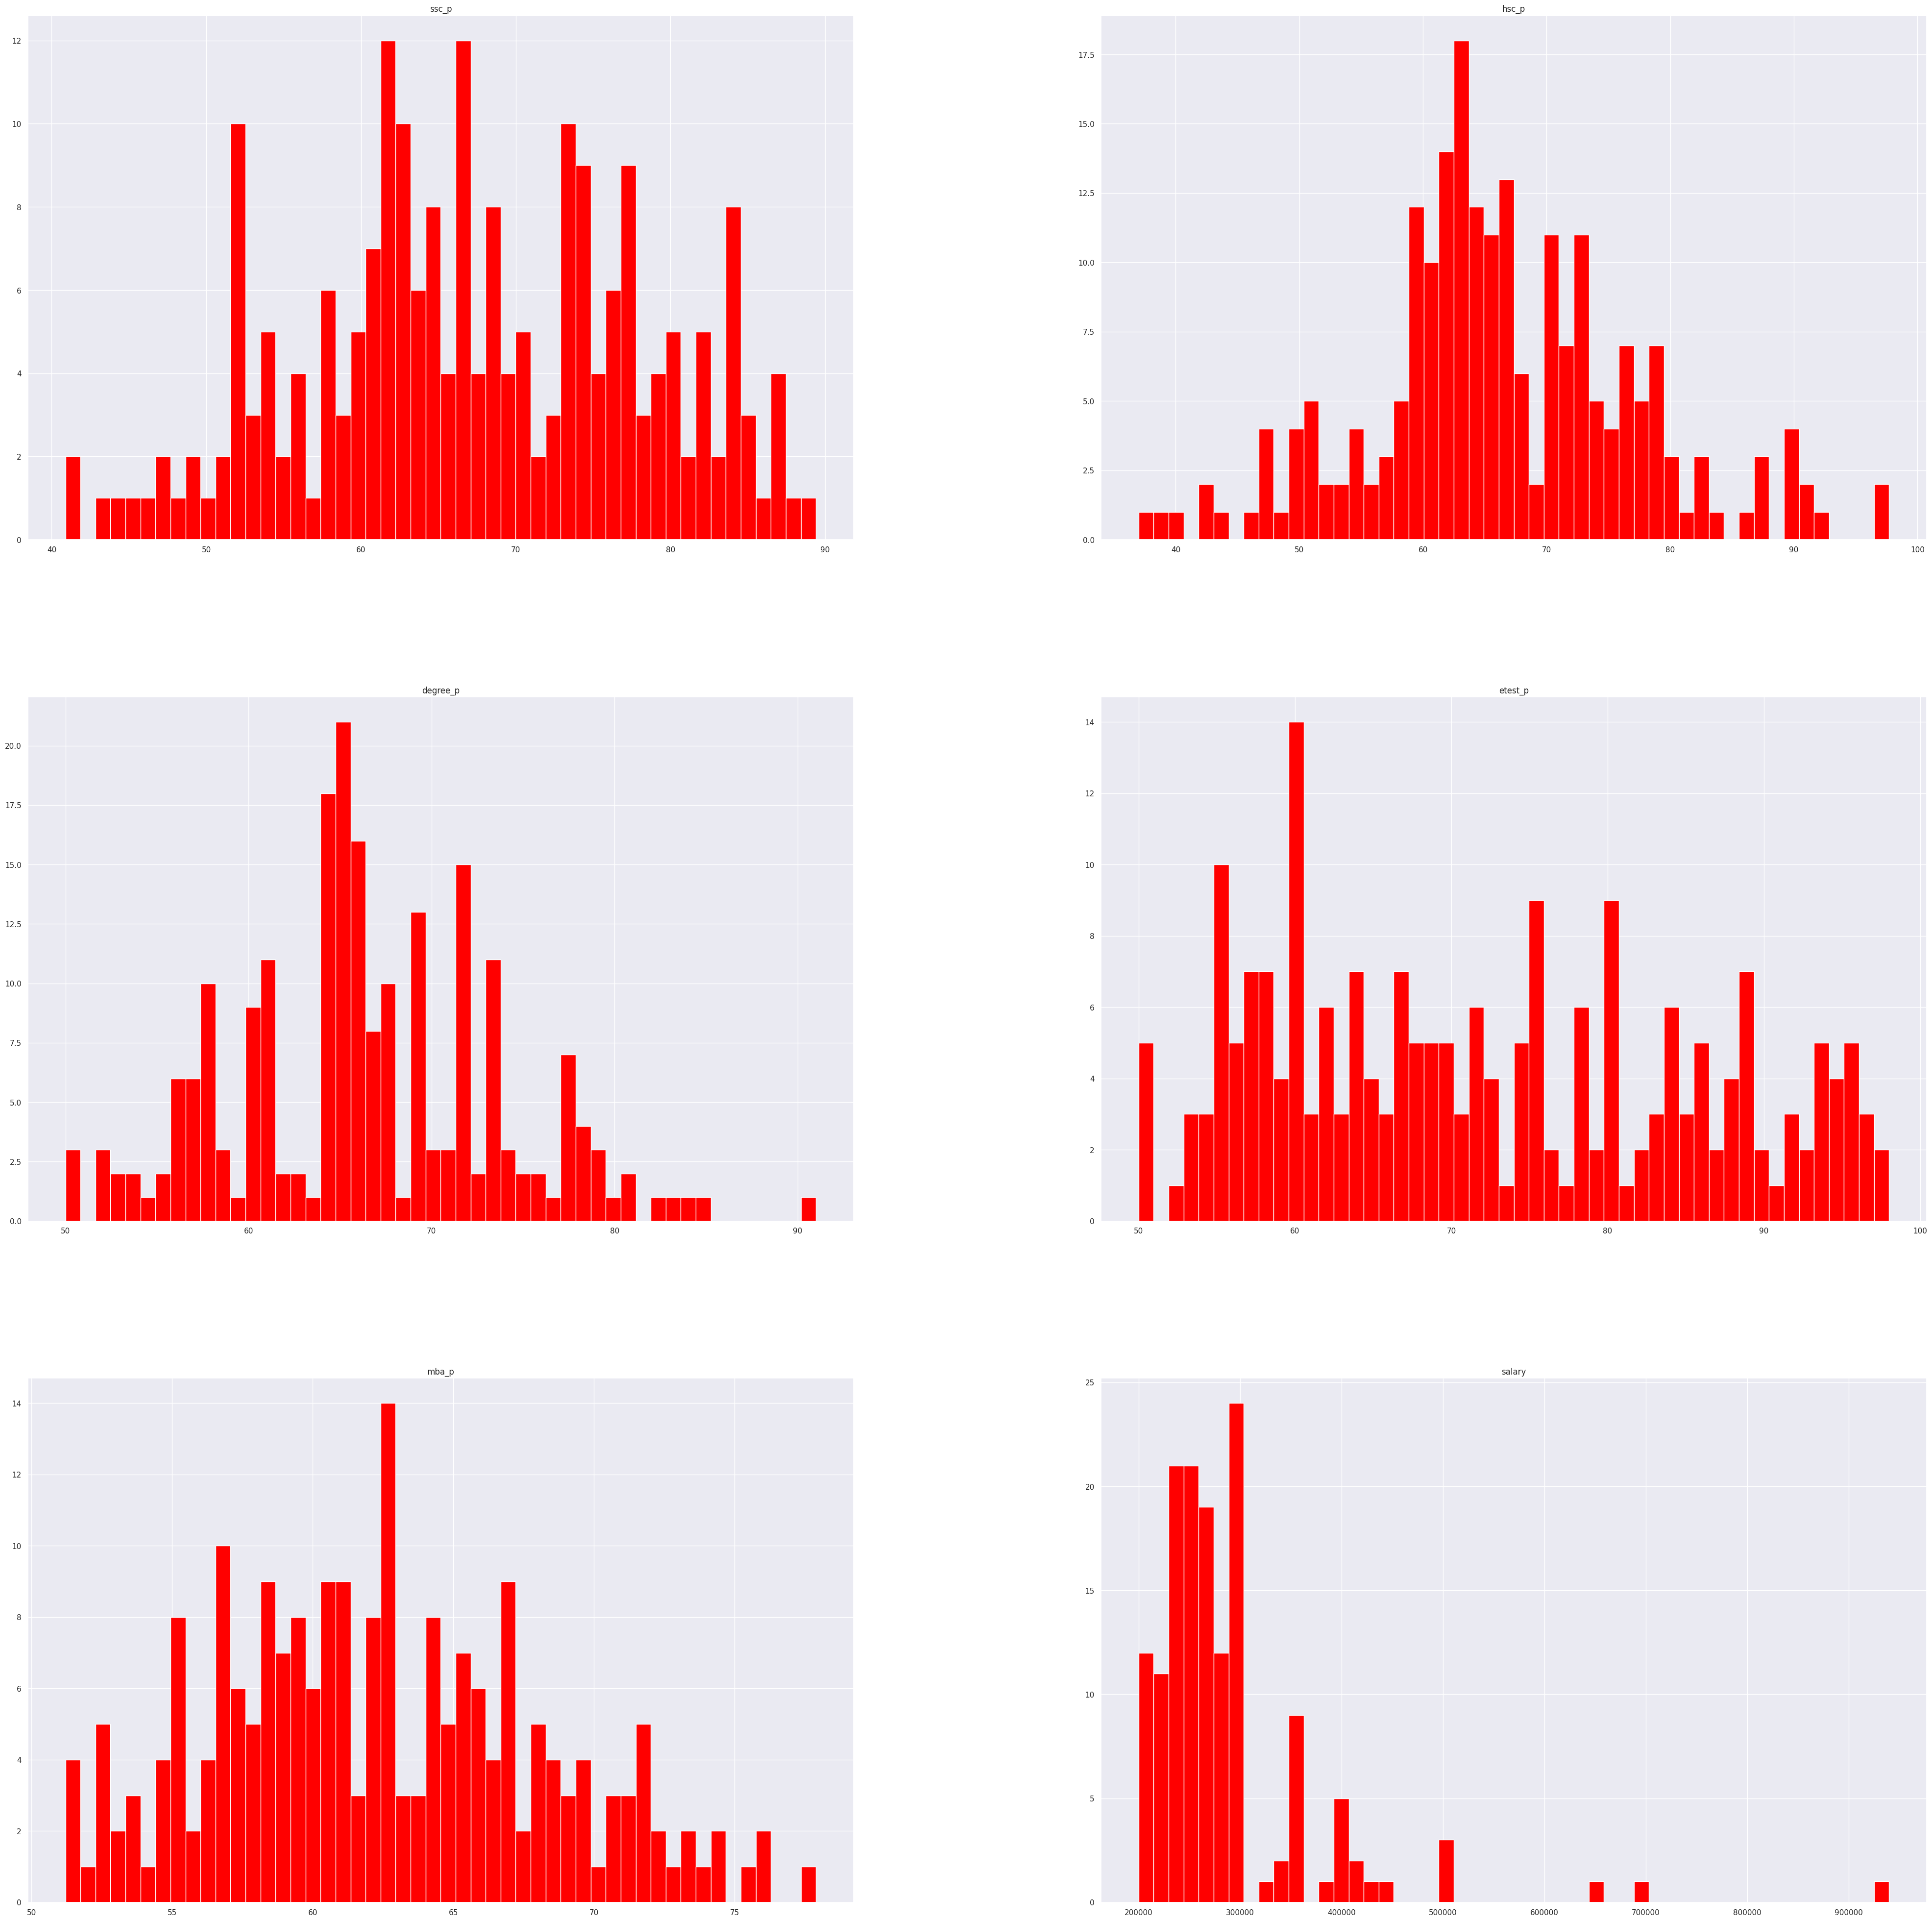

In [ ]:
camp.hist(figsize=(50,50), bins=50, color="red");

In [ ]:
def Print_values(dfs):
  for i in dfs.columns:
    if dfs[f'{i}'].dtype == 'O':
      print(i,":-")
      print(dfs[f'{i}'].value_counts())
      print("\n")
      print("****************************************************")

In [ ]:
Print_values(camp)

gender :-
M    139
F     76
Name: gender, dtype: int64


****************************************************
ssc_b :-
Central    116
Others      99
Name: ssc_b, dtype: int64


****************************************************
hsc_b :-
Others     131
Central     84
Name: hsc_b, dtype: int64


****************************************************
hsc_s :-
Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64


****************************************************
degree_t :-
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64


****************************************************
workex :-
No     141
Yes     74
Name: workex, dtype: int64


****************************************************
specialisation :-
Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64


****************************************************
status :-
Placed        148
Not Placed     67
Name: status, dtype: int64


**************************************

In [ ]:
Print_values(engg)

Gender :-
Male      2475
Female     491
Name: Gender, dtype: int64


****************************************************
Stream :-
Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64


****************************************************


In [ ]:
for i in engg.columns:
      print(i,":-")
      print(engg[f'{i}'].value_counts())
      print("\n")
      print("****************************************************")

Age :-
21    1084
22     941
20     375
23     195
19     156
24     131
26      50
25      29
28       3
30       1
29       1
Name: Age, dtype: int64


****************************************************
Gender :-
Male      2475
Female     491
Name: Gender, dtype: int64


****************************************************
Stream :-
Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64


****************************************************
Internships :-
0    1331
1    1234
2     350
3      51
Name: Internships, dtype: int64


****************************************************
CGPA :-
7    956
8    915
6    834
9    165
5     96
Name: CGPA, dtype: int64


****************************************************
Hostel :-
0    2168
1     798
Name: Hostel, dtype: int64


***********************

In [ ]:
camp.isna().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
camp['salary'] = camp['salary'].fillna(camp['salary'].mean())

<Axes: >

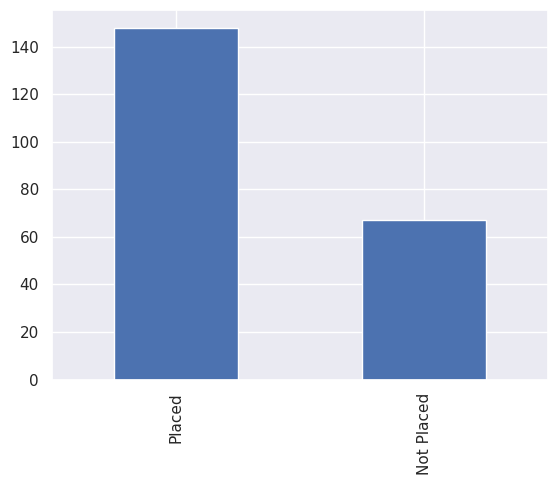

In [ ]:
camp['status'].value_counts().plot(kind='bar')

<Axes: >

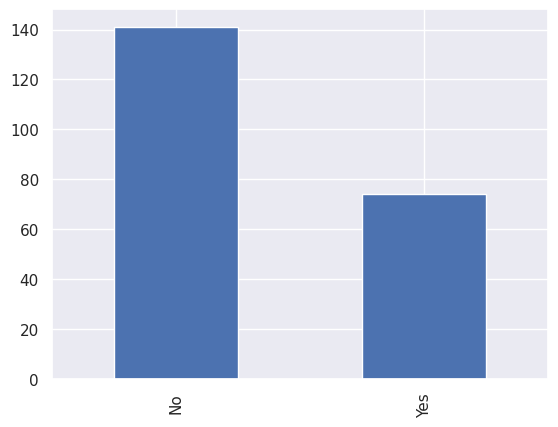

In [ ]:
camp['workex'].value_counts().plot(kind='bar')

<Axes: >

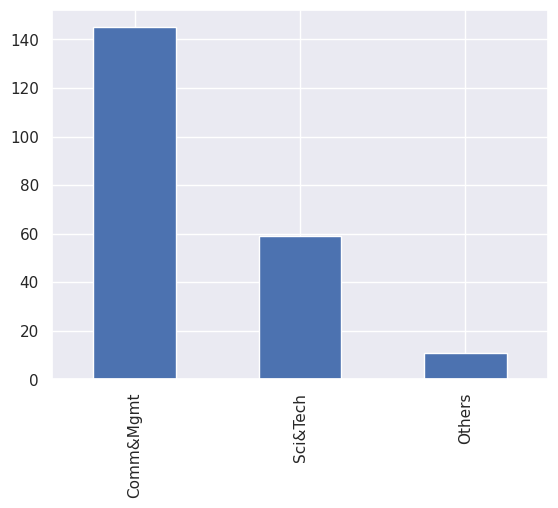

In [ ]:
camp['degree_t'].value_counts().plot(kind='bar')

In [ ]:
index_drop = camp.index[camp['degree_t']=='Comm&Mgmt'].tolist()

In [ ]:
index_comm = set(list(range(0,len(camp)))) - set(index_drop)
index_comm = list(index_comm)

In [ ]:
index_drop

[2,
 4,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 25,
 26,
 27,
 28,
 29,
 30,
 32,
 33,
 35,
 36,
 38,
 40,
 41,
 43,
 44,
 46,
 47,
 48,
 50,
 51,
 52,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 71,
 72,
 73,
 74,
 75,
 76,
 80,
 81,
 82,
 85,
 86,
 88,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 100,
 101,
 102,
 104,
 107,
 108,
 112,
 113,
 114,
 115,
 116,
 119,
 120,
 122,
 123,
 125,
 127,
 129,
 130,
 132,
 133,
 134,
 135,
 136,
 137,
 139,
 140,
 141,
 143,
 144,
 146,
 147,
 149,
 151,
 154,
 155,
 157,
 159,
 161,
 162,
 164,
 165,
 166,
 168,
 170,
 171,
 172,
 176,
 177,
 180,
 183,
 184,
 186,
 188,
 189,
 190,
 191,
 192,
 194,
 195,
 199,
 200,
 201,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 212,
 213,
 214]

In [ ]:
camp_sci = camp.drop(index_drop)

In [ ]:
camp_sci

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  degree_t  \
0        M  67.00   Others  91.00   Others  Commerce     58.00  Sci&Tech   
1        M  79.33  Central  78.33   Others   Science     77.48  Sci&Tech   
3        M  56.00  Central  52.00  Central   Science     52.00  Sci&Tech   
5        M  55.00   Others  49.80   Others   Science     67.25  Sci&Tech   
7        M  82.00  Central  64.00  Central   Science     66.00  Sci&Tech   
..     ...    ...      ...    ...      ...       ...       ...       ...   
196      M  72.00   Others  63.00   Others   Science     77.50  Sci&Tech   
197      F  83.96   Others  53.00   Others   Science     91.00  Sci&Tech   
198      F  67.00  Central  70.00  Central  Commerce     65.00    Others   
202      M  70.00  Central  63.00  Central   Science     66.00  Sci&Tech   
211      M  58.00   Others  60.00   Others   Science     72.00  Sci&Tech   

    workex  etest_p specialisation  mba_p      status         salary  
0       No    55.00         Mkt&HR  58.80      Placed  270000.000000  
1      Yes    86.50        Mkt&Fin  66.28      Placed  200000.000000  
3       No    66.00         Mkt&HR  59.43  Not Placed  288655.405405  
5      Yes    55.00        Mkt&Fin  51.58  Not Placed  288655.405405  
7      Yes    67.00        Mkt&Fin  62.14      Placed  252000.000000  
..     ...      ...            ...    ...         ...            ...  
196    Yes    78.00        Mkt&Fin  54.48      Placed  250000.000000  
197     No    59.32         Mkt&HR  69.71      Placed  260000.000000  
198     No    88.00         Mkt&HR  71.96  Not Placed  288655.405405  
202     No    61.28         Mkt&HR  60.11      Placed  240000.000000  
211     No    74.00        Mkt&Fin  53.62      Placed  275000.000000  

[70 rows x 14 columns]

<Axes: >

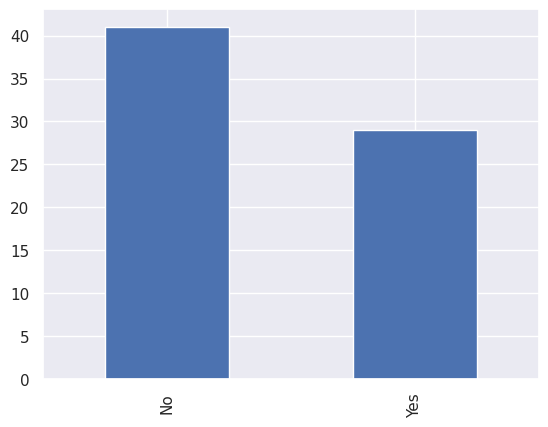

In [ ]:
camp_sci['workex'].value_counts().plot(kind='bar')

In [ ]:
camp_comm = camp.drop(index_comm)
camp_comm

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
2        M   65.0  Central   68.0  Central      Arts      64.0  Comm&Mgmt   
4        M   85.8  Central   73.6  Central  Commerce      73.3  Comm&Mgmt   
6        F   46.0   Others   49.2   Others  Commerce      79.0  Comm&Mgmt   
8        M   73.0  Central   79.0  Central  Commerce      72.0  Comm&Mgmt   
9        M   58.0  Central   70.0  Central  Commerce      61.0  Comm&Mgmt   
..     ...    ...      ...    ...      ...       ...       ...        ...   
209      M   62.0  Central   72.0  Central  Commerce      65.0  Comm&Mgmt   
210      M   80.6   Others   82.0   Others  Commerce      77.6  Comm&Mgmt   
212      M   67.0   Others   67.0   Others  Commerce      73.0  Comm&Mgmt   
213      F   74.0   Others   66.0   Others  Commerce      58.0  Comm&Mgmt   
214      M   62.0  Central   58.0   Others   Science      53.0  Comm&Mgmt   

    workex  etest_p specialisation  mba_p      status         salary  
2       No    75.00        Mkt&Fin  57.80      Placed  250000.000000  
4       No    96.80        Mkt&Fin  55.50      Placed  425000.000000  
6       No    74.28        Mkt&Fin  53.29  Not Placed  288655.405405  
8       No    91.34        Mkt&Fin  61.29      Placed  231000.000000  
9       No    54.00        Mkt&Fin  52.21  Not Placed  288655.405405  
..     ...      ...            ...    ...         ...            ...  
209     No    67.00        Mkt&Fin  56.49      Placed  216000.000000  
210     No    91.00        Mkt&Fin  74.49      Placed  400000.000000  
212    Yes    59.00        Mkt&Fin  69.72      Placed  295000.000000  
213     No    70.00         Mkt&HR  60.23      Placed  204000.000000  
214     No    89.00         Mkt&HR  60.22  Not Placed  288655.405405  

[145 rows x 14 columns]

<Axes: >

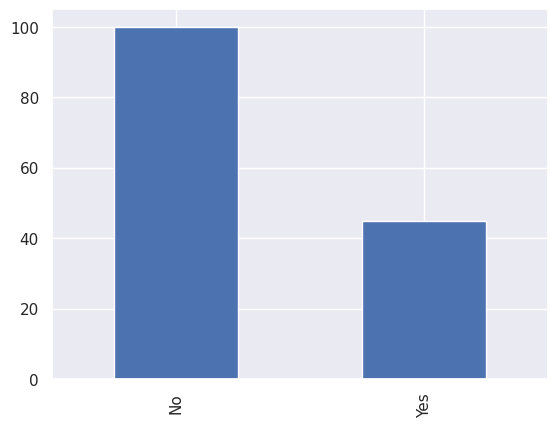

In [ ]:
camp_comm['workex'].value_counts().plot(kind='bar')

In [ ]:
placed_index = camp.index[camp['status']=='Not Placed'].to_list()

not_placed_index = set(list(range(len(camp)))) - set(placed_index)
not_placed_index = list(not_placed_index)

<Axes: >

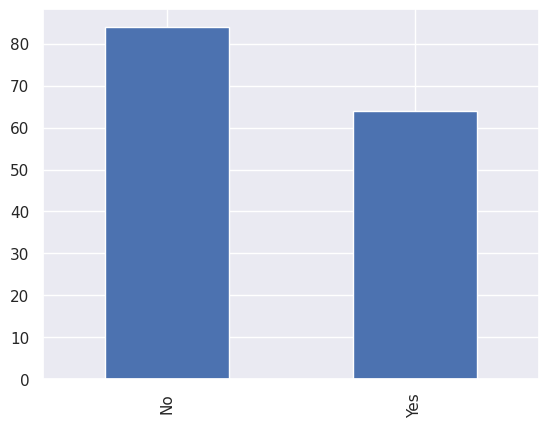

In [ ]:
camp_placed = camp.drop(placed_index)
camp_placed['workex'].value_counts().plot(kind='bar')

In [ ]:
camp_placed

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0        M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1        M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2        M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
4        M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
7        M  82.00  Central  64.00  Central   Science     66.00   Sci&Tech   
..     ...    ...      ...    ...      ...       ...       ...        ...   
209      M  62.00  Central  72.00  Central  Commerce     65.00  Comm&Mgmt   
210      M  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt   
211      M  58.00   Others  60.00   Others   Science     72.00   Sci&Tech   
212      M  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt   
213      F  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt   

    workex  etest_p specialisation  mba_p  status    salary  
0       No     55.0         Mkt&HR  58.80  Placed  270000.0  
1      Yes     86.5        Mkt&Fin  66.28  Placed  200000.0  
2       No     75.0        Mkt&Fin  57.80  Placed  250000.0  
4       No     96.8        Mkt&Fin  55.50  Placed  425000.0  
7      Yes     67.0        Mkt&Fin  62.14  Placed  252000.0  
..     ...      ...            ...    ...     ...       ...  
209     No     67.0        Mkt&Fin  56.49  Placed  216000.0  
210     No     91.0        Mkt&Fin  74.49  Placed  400000.0  
211     No     74.0        Mkt&Fin  53.62  Placed  275000.0  
212    Yes     59.0        Mkt&Fin  69.72  Placed  295000.0  
213     No     70.0         Mkt&HR  60.23  Placed  204000.0  

[148 rows x 14 columns]

<Axes: >

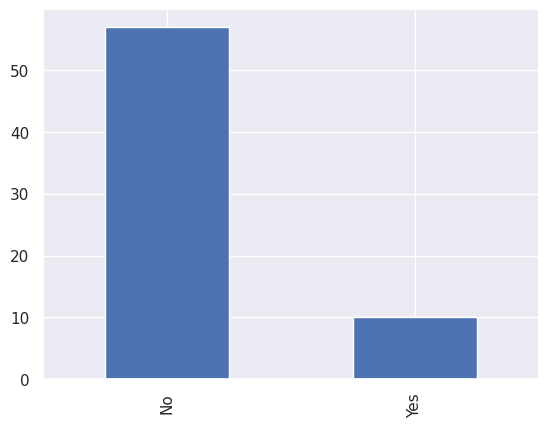

In [ ]:
camp_not_placed = camp.drop(not_placed_index)
camp_not_placed['workex'].value_counts().plot(kind='bar')

In [ ]:
camp_not_placed

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
3        M   56.0  Central   52.0  Central   Science     52.00   Sci&Tech   
5        M   55.0   Others   49.8   Others   Science     67.25   Sci&Tech   
6        F   46.0   Others   49.2   Others  Commerce     79.00  Comm&Mgmt   
9        M   58.0  Central   70.0  Central  Commerce     61.00  Comm&Mgmt   
12       F   47.0  Central   55.0   Others   Science     65.00  Comm&Mgmt   
..     ...    ...      ...    ...      ...       ...       ...        ...   
198      F   67.0  Central   70.0  Central  Commerce     65.00     Others   
201      M   54.2  Central   63.0   Others   Science     58.00  Comm&Mgmt   
206      M   41.0  Central   42.0  Central   Science     60.00  Comm&Mgmt   
208      F   43.0  Central   60.0   Others   Science     65.00  Comm&Mgmt   
214      M   62.0  Central   58.0   Others   Science     53.00  Comm&Mgmt   

    workex  etest_p specialisation  mba_p      status         salary  
3       No    66.00         Mkt&HR  59.43  Not Placed  288655.405405  
5      Yes    55.00        Mkt&Fin  51.58  Not Placed  288655.405405  
6       No    74.28        Mkt&Fin  53.29  Not Placed  288655.405405  
9       No    54.00        Mkt&Fin  52.21  Not Placed  288655.405405  
12      No    62.00         Mkt&HR  65.04  Not Placed  288655.405405  
..     ...      ...            ...    ...         ...            ...  
198     No    88.00         Mkt&HR  71.96  Not Placed  288655.405405  
201     No    79.00         Mkt&HR  58.44  Not Placed  288655.405405  
206     No    97.00        Mkt&Fin  53.39  Not Placed  288655.405405  
208     No    92.66         Mkt&HR  62.92  Not Placed  288655.405405  
214     No    89.00         Mkt&HR  60.22  Not Placed  288655.405405  

[67 rows x 14 columns]

<ipython-input-76-33f2beb114c1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = camp.corr()


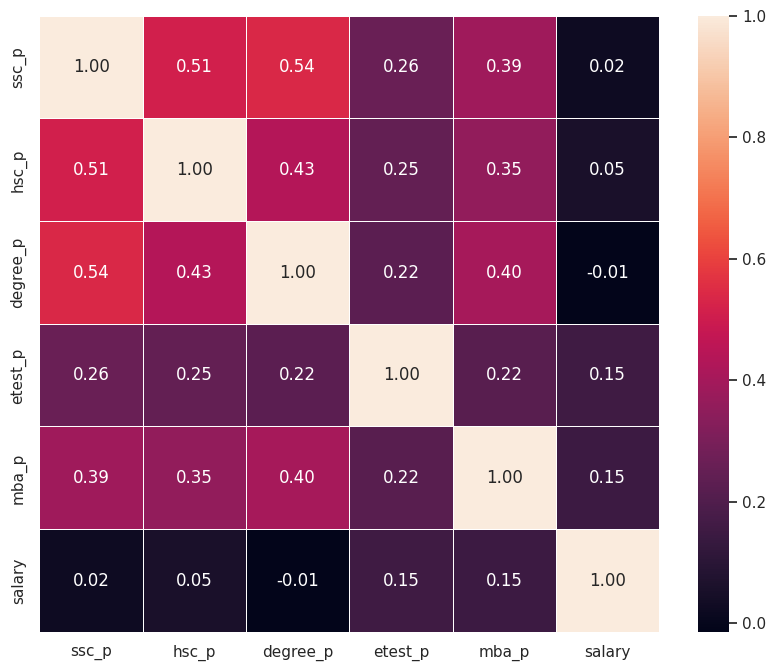

In [ ]:
corr_matrix = camp.corr()
fig , ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

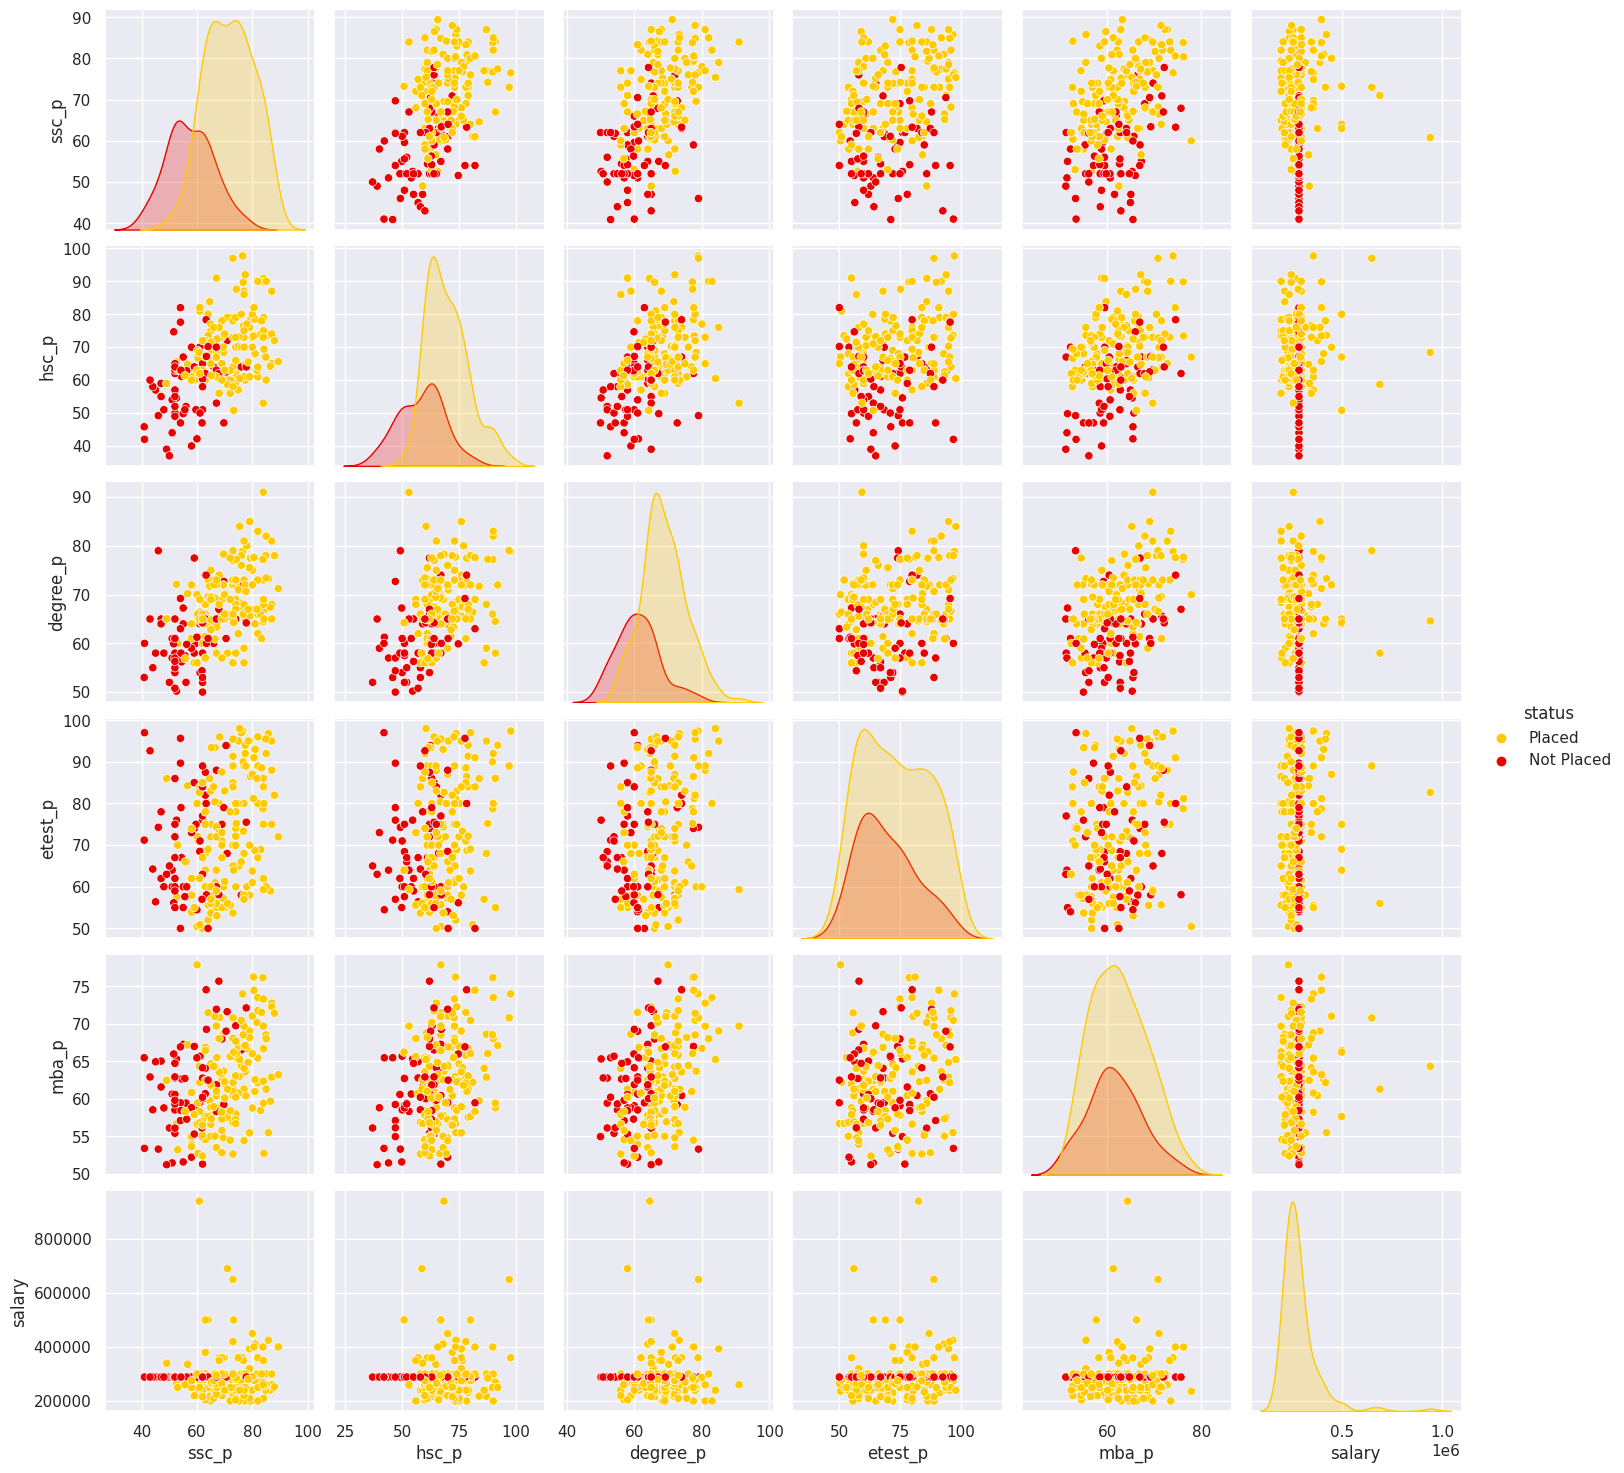

In [ ]:
sns.set_style("darkgrid")
sns.set('notebook')
sns.pairplot(camp, hue="status", palette='hot_r')
plt.show()

In [ ]:
def One_Hot(dfs,columns,drop_cols):
  encoder = OneHotEncoder(handle_unknown='ignore')

  encoder_df = pd.DataFrame(encoder.fit_transform(dfs[[columns]]).toarray())
  encoder_len = len(encoder_df.columns)

  dfs = dfs.join(encoder_df)

  dfs.drop(columns, axis=1, inplace=True)

  return dfs,encoder_len

In [ ]:
def col_trans(dfs,drop_cols,encoder_len):
  cols = list(dfs.columns)
  for i in range(0,encoder_len):
    cols.remove(i)
  dfs.columns = cols+drop_cols
  return dfs

In [ ]:
cols=[]
for i in camp.columns:
    if camp[f'{i}'].dtype == 'O':
      cols.append(i)

cols.remove('workex')

In [ ]:
camp_copy = copy.deepcopy(camp)

In [ ]:
for i in cols:
  par_cols = list(camp[i].unique())
  camp_copy,len_enc=One_Hot(camp_copy,i,par_cols)
  camp_copy= col_trans(camp_copy,par_cols,len_enc)

In [ ]:
camp_copy['workex'].replace(['No','Yes'],[0,1],inplace=True)

In [ ]:
camp_copy

ssc_p  hsc_p  degree_p  workex  etest_p  mba_p         salary    M    F  \
0    67.00  91.00     58.00       0     55.0  58.80  270000.000000  0.0  1.0   
1    79.33  78.33     77.48       1     86.5  66.28  200000.000000  0.0  1.0   
2    65.00  68.00     64.00       0     75.0  57.80  250000.000000  0.0  1.0   
3    56.00  52.00     52.00       0     66.0  59.43  288655.405405  0.0  1.0   
4    85.80  73.60     73.30       0     96.8  55.50  425000.000000  0.0  1.0   
..     ...    ...       ...     ...      ...    ...            ...  ...  ...   
210  80.60  82.00     77.60       0     91.0  74.49  400000.000000  0.0  1.0   
211  58.00  60.00     72.00       0     74.0  53.62  275000.000000  0.0  1.0   
212  67.00  67.00     73.00       1     59.0  69.72  295000.000000  0.0  1.0   
213  74.00  66.00     58.00       0     70.0  60.23  204000.000000  1.0  0.0   
214  62.00  58.00     53.00       0     89.0  60.22  288655.405405  0.0  1.0   

     Others  ...  Commerce  Science  Arts  Sci&Tech  Comm&Mgmt  Others  \
0       0.0  ...       0.0      1.0   0.0       0.0        0.0     1.0   
1       1.0  ...       0.0      0.0   1.0       0.0        0.0     1.0   
2       1.0  ...       1.0      0.0   0.0       1.0        0.0     0.0   
3       1.0  ...       0.0      0.0   1.0       0.0        0.0     1.0   
4       1.0  ...       0.0      1.0   0.0       1.0        0.0     0.0   
..      ...  ...       ...      ...   ...       ...        ...     ...   
210     0.0  ...       0.0      1.0   0.0       1.0        0.0     0.0   
211     0.0  ...       0.0      0.0   1.0       0.0        0.0     1.0   
212     0.0  ...       0.0      1.0   0.0       1.0        0.0     0.0   
213     0.0  ...       0.0      1.0   0.0       1.0        0.0     0.0   
214     1.0  ...       0.0      0.0   1.0       1.0        0.0     0.0   

     Mkt&HR  Mkt&Fin  Placed  Not Placed  
0       0.0      1.0     0.0         1.0  
1       1.0      0.0     0.0         1.0  
2       1.0      0.0     0.0         1.0  
3       0.0      1.0     1.0         0.0  
4       1.0      0.0     0.0         1.0  
..      ...      ...     ...         ...  
210     1.0      0.0     0.0         1.0  
211     1.0      0.0     0.0         1.0  
212     1.0      0.0     0.0         1.0  
213     0.0      1.0     0.0         1.0  
214     0.0      1.0     1.0         0.0  

[215 rows x 23 columns]

In [ ]:
camp_copy_placed = camp_copy.drop('Not Placed',axis=1)

In [ ]:
camp['ssc_p'].dtype

dtype('float64')

In [ ]:
num_cols = []

for i in camp.columns:
    if camp[f'{i}'].dtype == 'float64':
      num_cols.append(i)

In [ ]:
Scaler = MinMaxScaler()

for i in num_cols:
  camp_copy_placed[i] = Scaler.fit_transform(np.array(camp_copy_placed[i]).reshape(-1,1))

In [ ]:
num_cols

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [ ]:
scaler_ssc_p = MinMaxScaler()
scaler_ssc_p.fit(np.array(camp_copy_placed['ssc_p']).reshape(-1,1))
pickle.dump(scaler_ssc_p, open('scaler_ssc_p.pkl', 'wb'))

MinMaxScaler()

In [ ]:
scaler_hsc_p = MinMaxScaler()
scaler_hsc_p.fit(np.array(camp_copy_placed['hsc_p']).reshape(-1,1))
pickle.dump(scaler_hsc_p, open('scaler_hsc_p.pkl', 'wb'))

In [ ]:
scaler_degree_p = MinMaxScaler()
scaler_degree_p.fit(np.array(camp_copy_placed['hsc_p']).reshape(-1,1))
pickle.dump(scaler_degree_p, open('scaler_degree_p.pkl', 'wb'))

In [ ]:
scaler_etest_p = MinMaxScaler()
scaler_etest_p.fit(np.array(camp_copy_placed['etest_p']).reshape(-1,1))
pickle.dump(scaler_deg_p, open('scaler_etest_p.pkl', 'wb'))

In [ ]:
scaler_mba_p = MinMaxScaler()
scaler_mba_p.fit(np.array(camp_copy_placed['mba_p']).reshape(-1,1))
pickle.dump(scaler_hsc_p, open('scaler_etest_p.pkl', 'wb'))

In [ ]:
camp_copy_placed['ssc_p']

0      0.538240
1      0.792414
2      0.497011
3      0.311482
4      0.925788
         ...   
210    0.818594
211    0.352711
212    0.538240
213    0.682540
214    0.435168
Name: ssc_p, Length: 215, dtype: float64

<Axes: title={'center': 'Correlation with status'}>

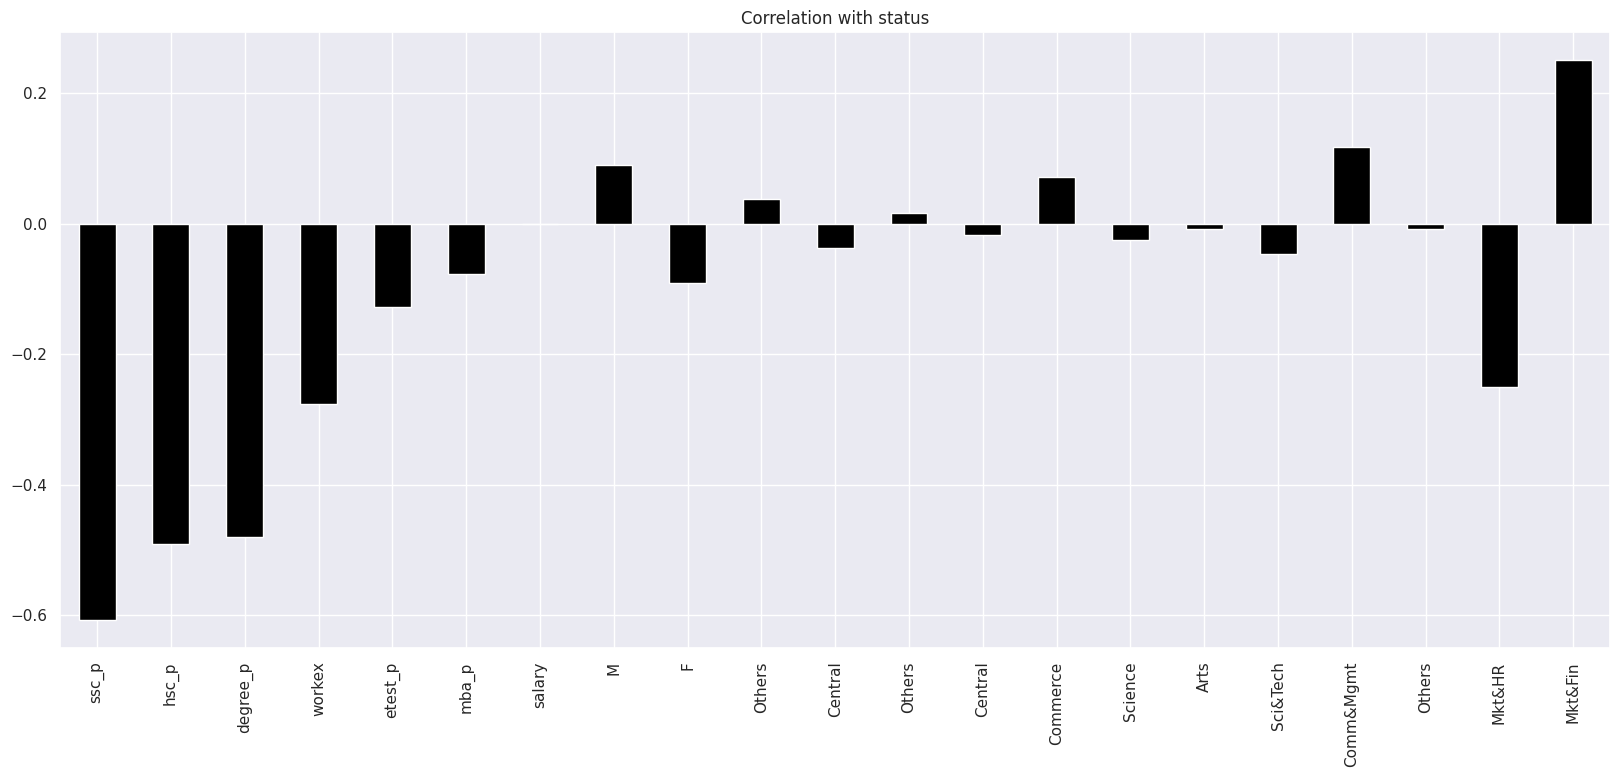

In [ ]:
camp_copy_placed.drop('Placed', axis=1).corrwith(camp_copy_placed.Placed).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with status",color="Black")

In [ ]:
camp_copy_not_placed = camp_copy.drop('Placed',axis=1)

In [ ]:
for i in num_cols:
  camp_copy_not_placed[i] = Scaler.fit_transform(np.array(camp_copy_not_placed[i]).reshape(-1,1))

<Axes: title={'center': 'Correlation with status'}>

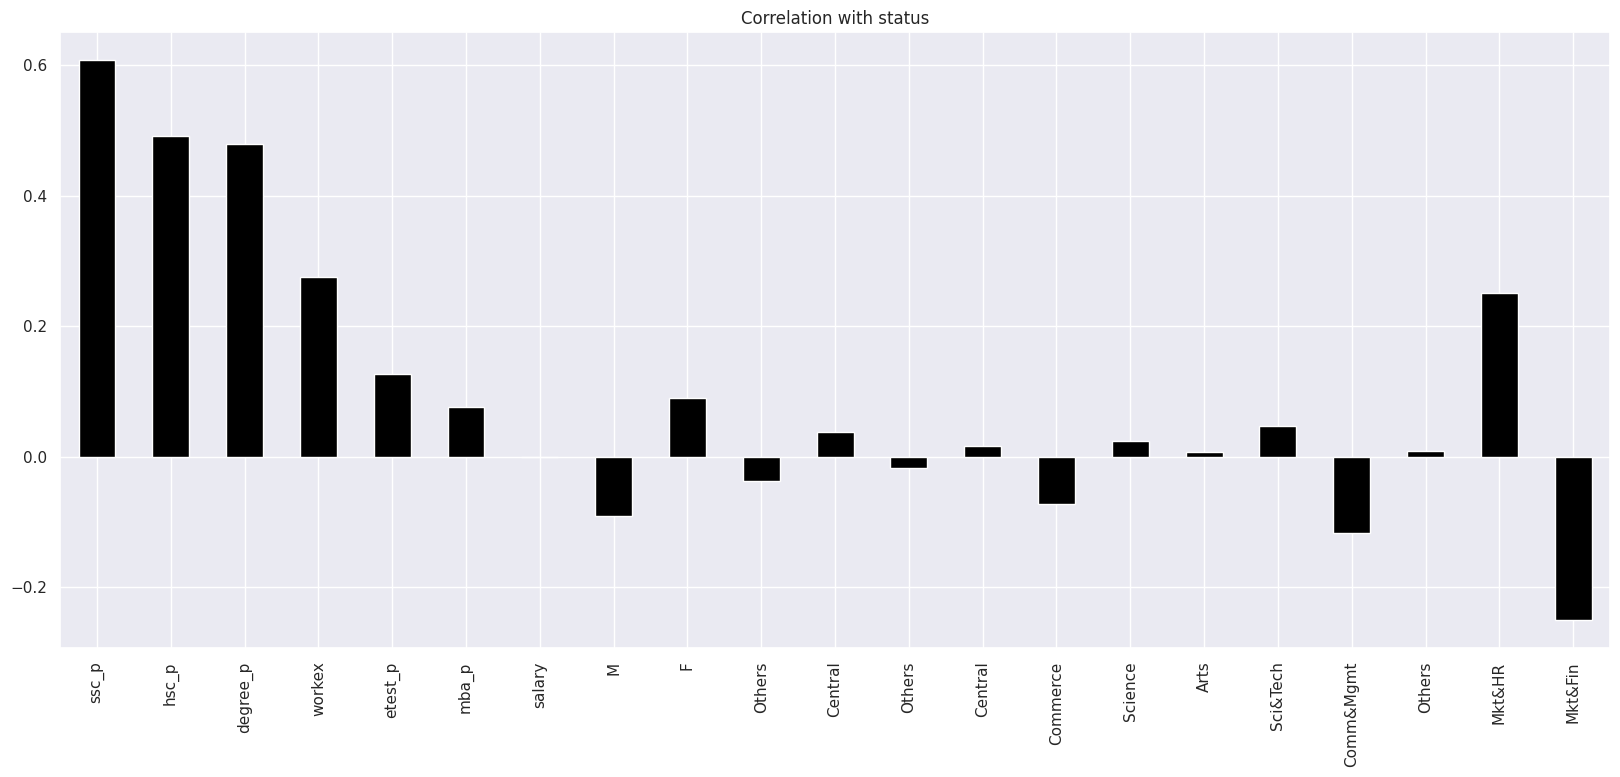

In [ ]:
camp_copy_not_placed.drop('Not Placed', axis=1).corrwith(camp_copy_not_placed['Not Placed']).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with status",color="Black")

In [ ]:
camp

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0        M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1        M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2        M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3        M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4        M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
..     ...    ...      ...    ...      ...       ...       ...        ...   
210      M  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt   
211      M  58.00   Others  60.00   Others   Science     72.00   Sci&Tech   
212      M  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt   
213      F  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt   
214      M  62.00  Central  58.00   Others   Science     53.00  Comm&Mgmt   

    workex  etest_p specialisation  mba_p      status         salary  
0       No     55.0         Mkt&HR  58.80      Placed  270000.000000  
1      Yes     86.5        Mkt&Fin  66.28      Placed  200000.000000  
2       No     75.0        Mkt&Fin  57.80      Placed  250000.000000  
3       No     66.0         Mkt&HR  59.43  Not Placed  288655.405405  
4       No     96.8        Mkt&Fin  55.50      Placed  425000.000000  
..     ...      ...            ...    ...         ...            ...  
210     No     91.0        Mkt&Fin  74.49      Placed  400000.000000  
211     No     74.0        Mkt&Fin  53.62      Placed  275000.000000  
212    Yes     59.0        Mkt&Fin  69.72      Placed  295000.000000  
213     No     70.0         Mkt&HR  60.23      Placed  204000.000000  
214     No     89.0         Mkt&HR  60.22  Not Placed  288655.405405  

[215 rows x 14 columns]

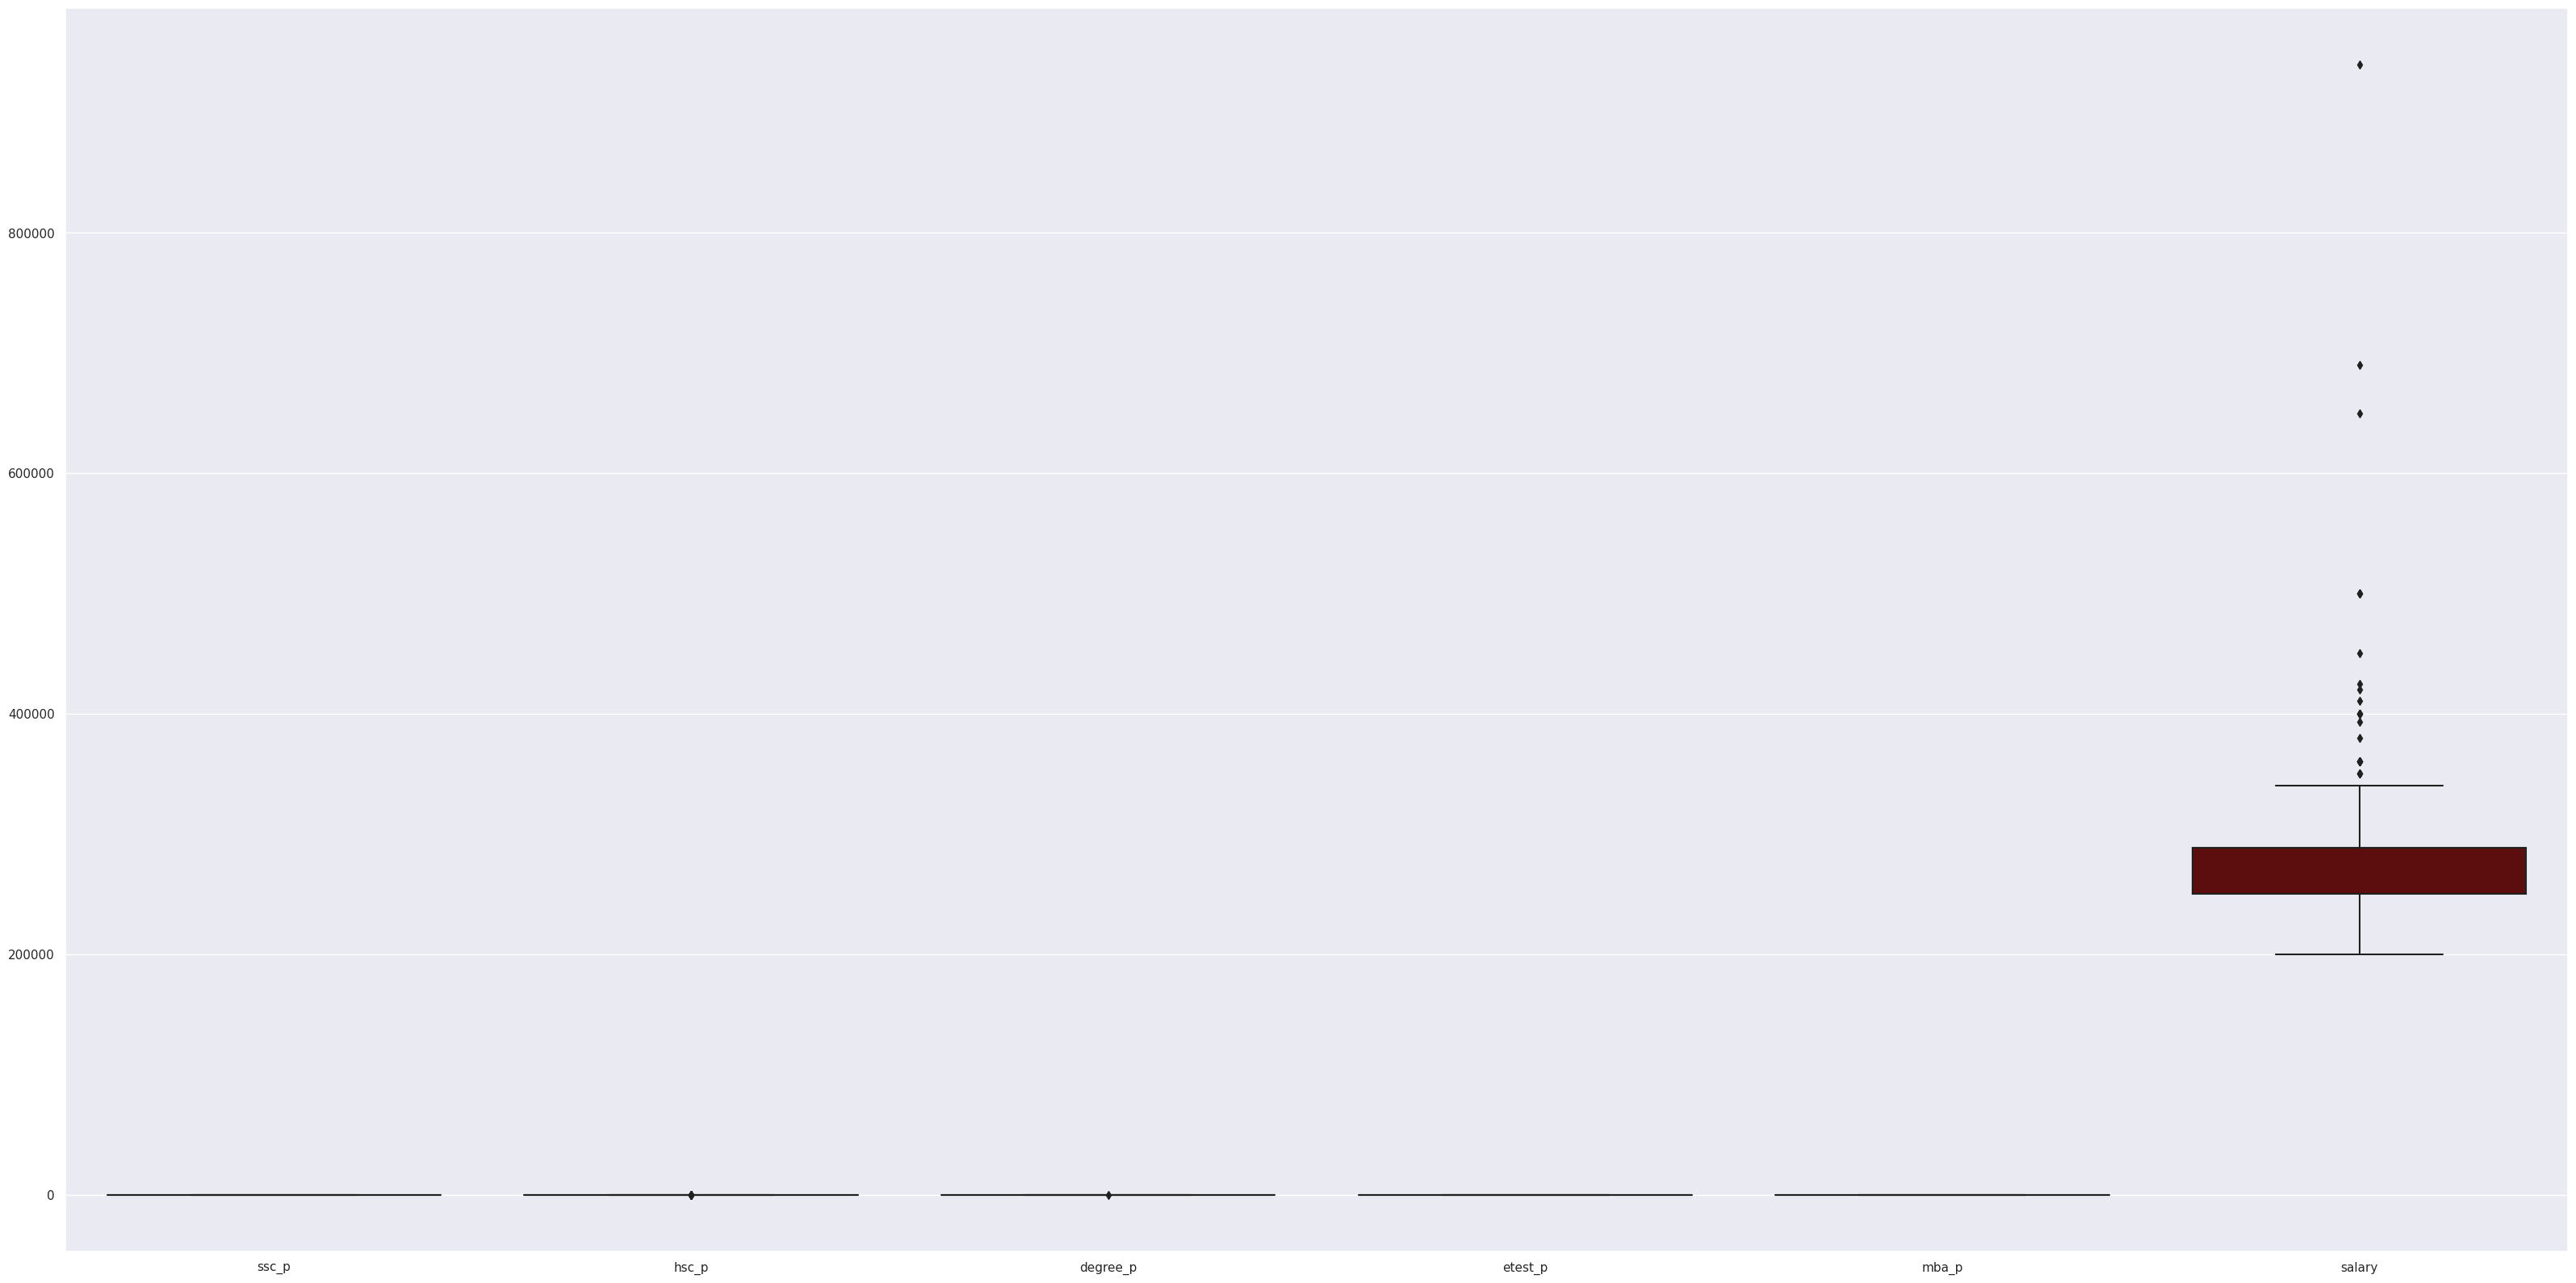

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))

sns.set_style("darkgrid")
sns.set('notebook')
sns.boxplot(camp, palette='hot_r',ax=ax)
plt.show()

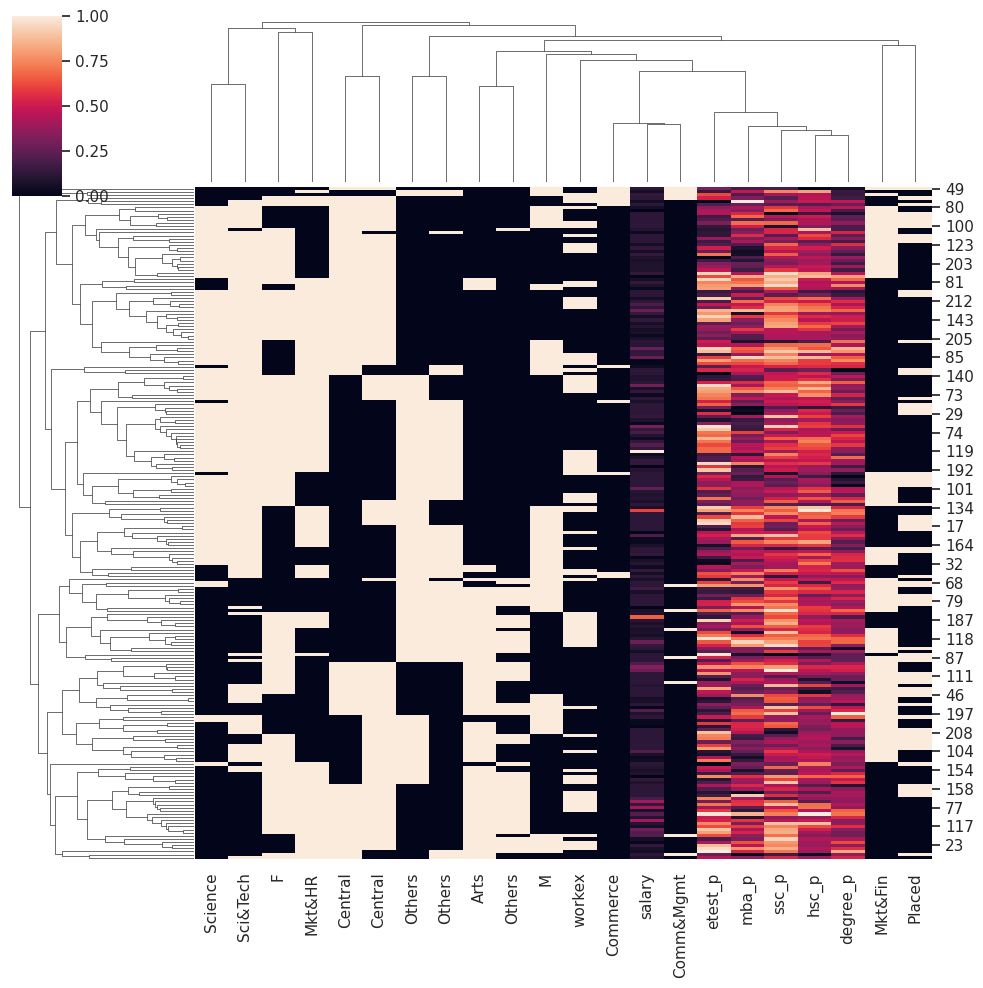

In [ ]:
sns.clustermap(camp_copy_placed)

In [ ]:
camp

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0        M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1        M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2        M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3        M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4        M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
..     ...    ...      ...    ...      ...       ...       ...        ...   
210      M  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt   
211      M  58.00   Others  60.00   Others   Science     72.00   Sci&Tech   
212      M  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt   
213      F  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt   
214      M  62.00  Central  58.00   Others   Science     53.00  Comm&Mgmt   

    workex  etest_p specialisation  mba_p      status         salary  
0       No     55.0         Mkt&HR  58.80      Placed  270000.000000  
1      Yes     86.5        Mkt&Fin  66.28      Placed  200000.000000  
2       No     75.0        Mkt&Fin  57.80      Placed  250000.000000  
3       No     66.0         Mkt&HR  59.43  Not Placed  288655.405405  
4       No     96.8        Mkt&Fin  55.50      Placed  425000.000000  
..     ...      ...            ...    ...         ...            ...  
210     No     91.0        Mkt&Fin  74.49      Placed  400000.000000  
211     No     74.0        Mkt&Fin  53.62      Placed  275000.000000  
212    Yes     59.0        Mkt&Fin  69.72      Placed  295000.000000  
213     No     70.0         Mkt&HR  60.23      Placed  204000.000000  
214     No     89.0         Mkt&HR  60.22  Not Placed  288655.405405  

[215 rows x 14 columns]

In [ ]:
cols

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation', 'status']

In [ ]:
cols.append('workex')
cols.remove('status')
dictionary1 = {}
dictionary2 = {}
for i in cols:
  dictionary1[i]=(list(camp[i].unique()))
  dictionary2[i] = list(range(0,camp[i].nunique()))

  camp[i].replace(list(camp[i].unique()),list(range(0,camp[i].nunique())),inplace=True)

camp['status'].replace(['Placed','Not Placed'],[0,1],inplace=True)

In [ ]:
camp

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         0  67.00      0  91.00      0      0     58.00         0       0   
1         0  79.33      1  78.33      0      1     77.48         0       1   
2         0  65.00      1  68.00      1      2     64.00         1       0   
3         0  56.00      1  52.00      1      1     52.00         0       0   
4         0  85.80      1  73.60      1      0     73.30         1       0   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
210       0  80.60      0  82.00      0      0     77.60         1       0   
211       0  58.00      0  60.00      0      1     72.00         0       0   
212       0  67.00      0  67.00      0      0     73.00         1       1   
213       1  74.00      0  66.00      0      0     58.00         1       0   
214       0  62.00      1  58.00      0      1     53.00         1       0   

     etest_p  specialisation  mba_p  status         salary  
0       55.0               0  58.80       0  270000.000000  
1       86.5               1  66.28       0  200000.000000  
2       75.0               1  57.80       0  250000.000000  
3       66.0               0  59.43       1  288655.405405  
4       96.8               1  55.50       0  425000.000000  
..       ...             ...    ...     ...            ...  
210     91.0               1  74.49       0  400000.000000  
211     74.0               1  53.62       0  275000.000000  
212     59.0               1  69.72       0  295000.000000  
213     70.0               0  60.23       0  204000.000000  
214     89.0               0  60.22       1  288655.405405  

[215 rows x 14 columns]

In [ ]:
dictionary1

{'gender': ['M', 'F'],
 'ssc_b': ['Others', 'Central'],
 'hsc_b': ['Others', 'Central'],
 'hsc_s': ['Commerce', 'Science', 'Arts'],
 'degree_t': ['Sci&Tech', 'Comm&Mgmt', 'Others'],
 'specialisation': ['Mkt&HR', 'Mkt&Fin'],
 'workex': ['No', 'Yes']}

In [ ]:
dictionary2

{'gender': [0, 1],
 'ssc_b': [0, 1],
 'hsc_b': [0, 1],
 'hsc_s': [0, 1, 2],
 'degree_t': [0, 1, 2],
 'specialisation': [0, 1],
 'workex': [0, 1]}

In [ ]:
for i in num_cols:
  camp[i] = Scaler.fit_transform(np.array(camp[i]).reshape(-1,1))

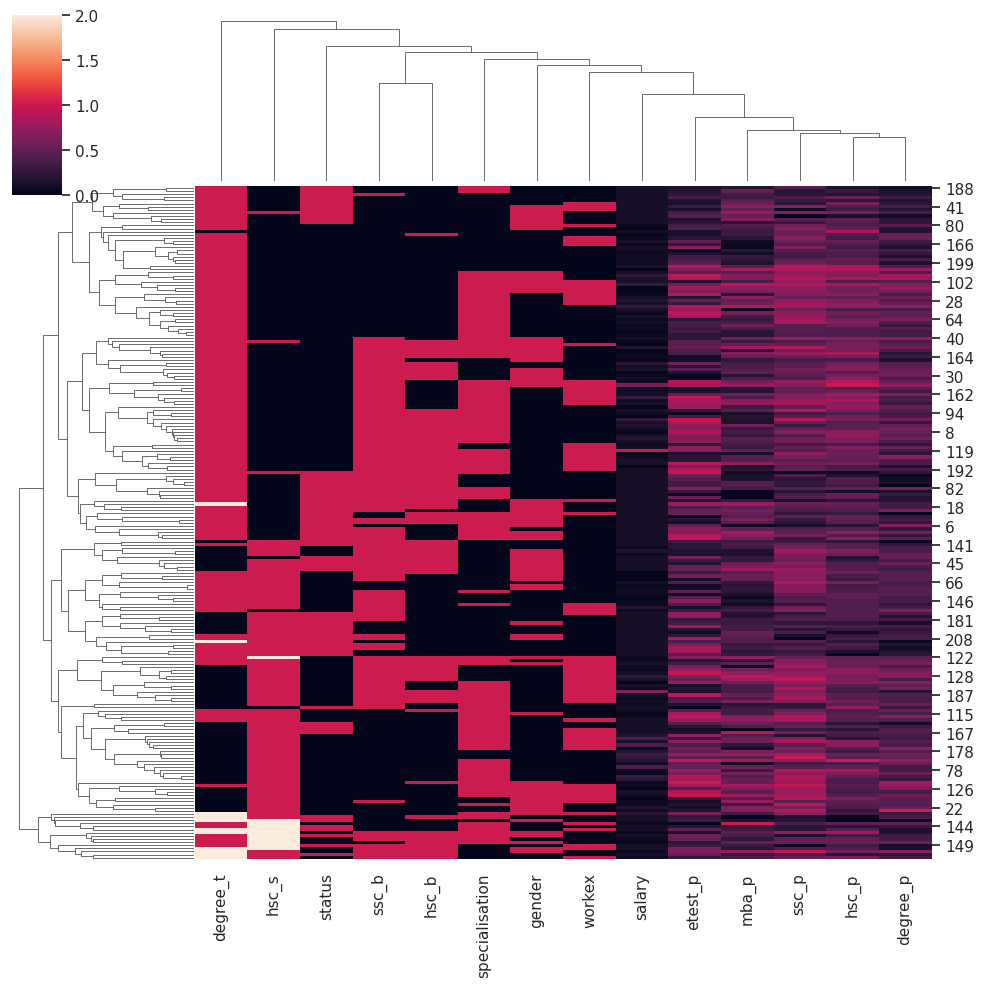

In [ ]:
sns.clustermap(camp)

In [ ]:
for i in camp.columns:
      print(i,":-")
      print(camp[f'{i}'].value_counts())
      print("\n")
      print("****************************************************")

gender :-
0    139
1     76
Name: gender, dtype: int64


****************************************************
ssc_p :-
0.435168    11
0.455782    10
0.538240     9
0.229025     9
0.661925     9
            ..
0.593898     1
0.825191     1
0.868068     1
0.940219     1
0.818594     1
Name: ssc_p, Length: 103, dtype: int64


****************************************************
ssc_b :-
1    116
0     99
Name: ssc_b, dtype: int64


****************************************************
hsc_p :-
0.428336    14
0.411862    12
0.494234     9
0.378913     9
0.444811     8
            ..
0.771499     1
0.550247     1
0.887974     1
0.870346     1
0.082372     1
Name: hsc_p, Length: 97, dtype: int64


****************************************************
hsc_b :-
0    131
1     84
Name: hsc_b, dtype: int64


****************************************************
hsc_s :-
0    113
1     91
2     11
Name: hsc_s, dtype: int64


****************************************************
degree_p :-
0.365854  

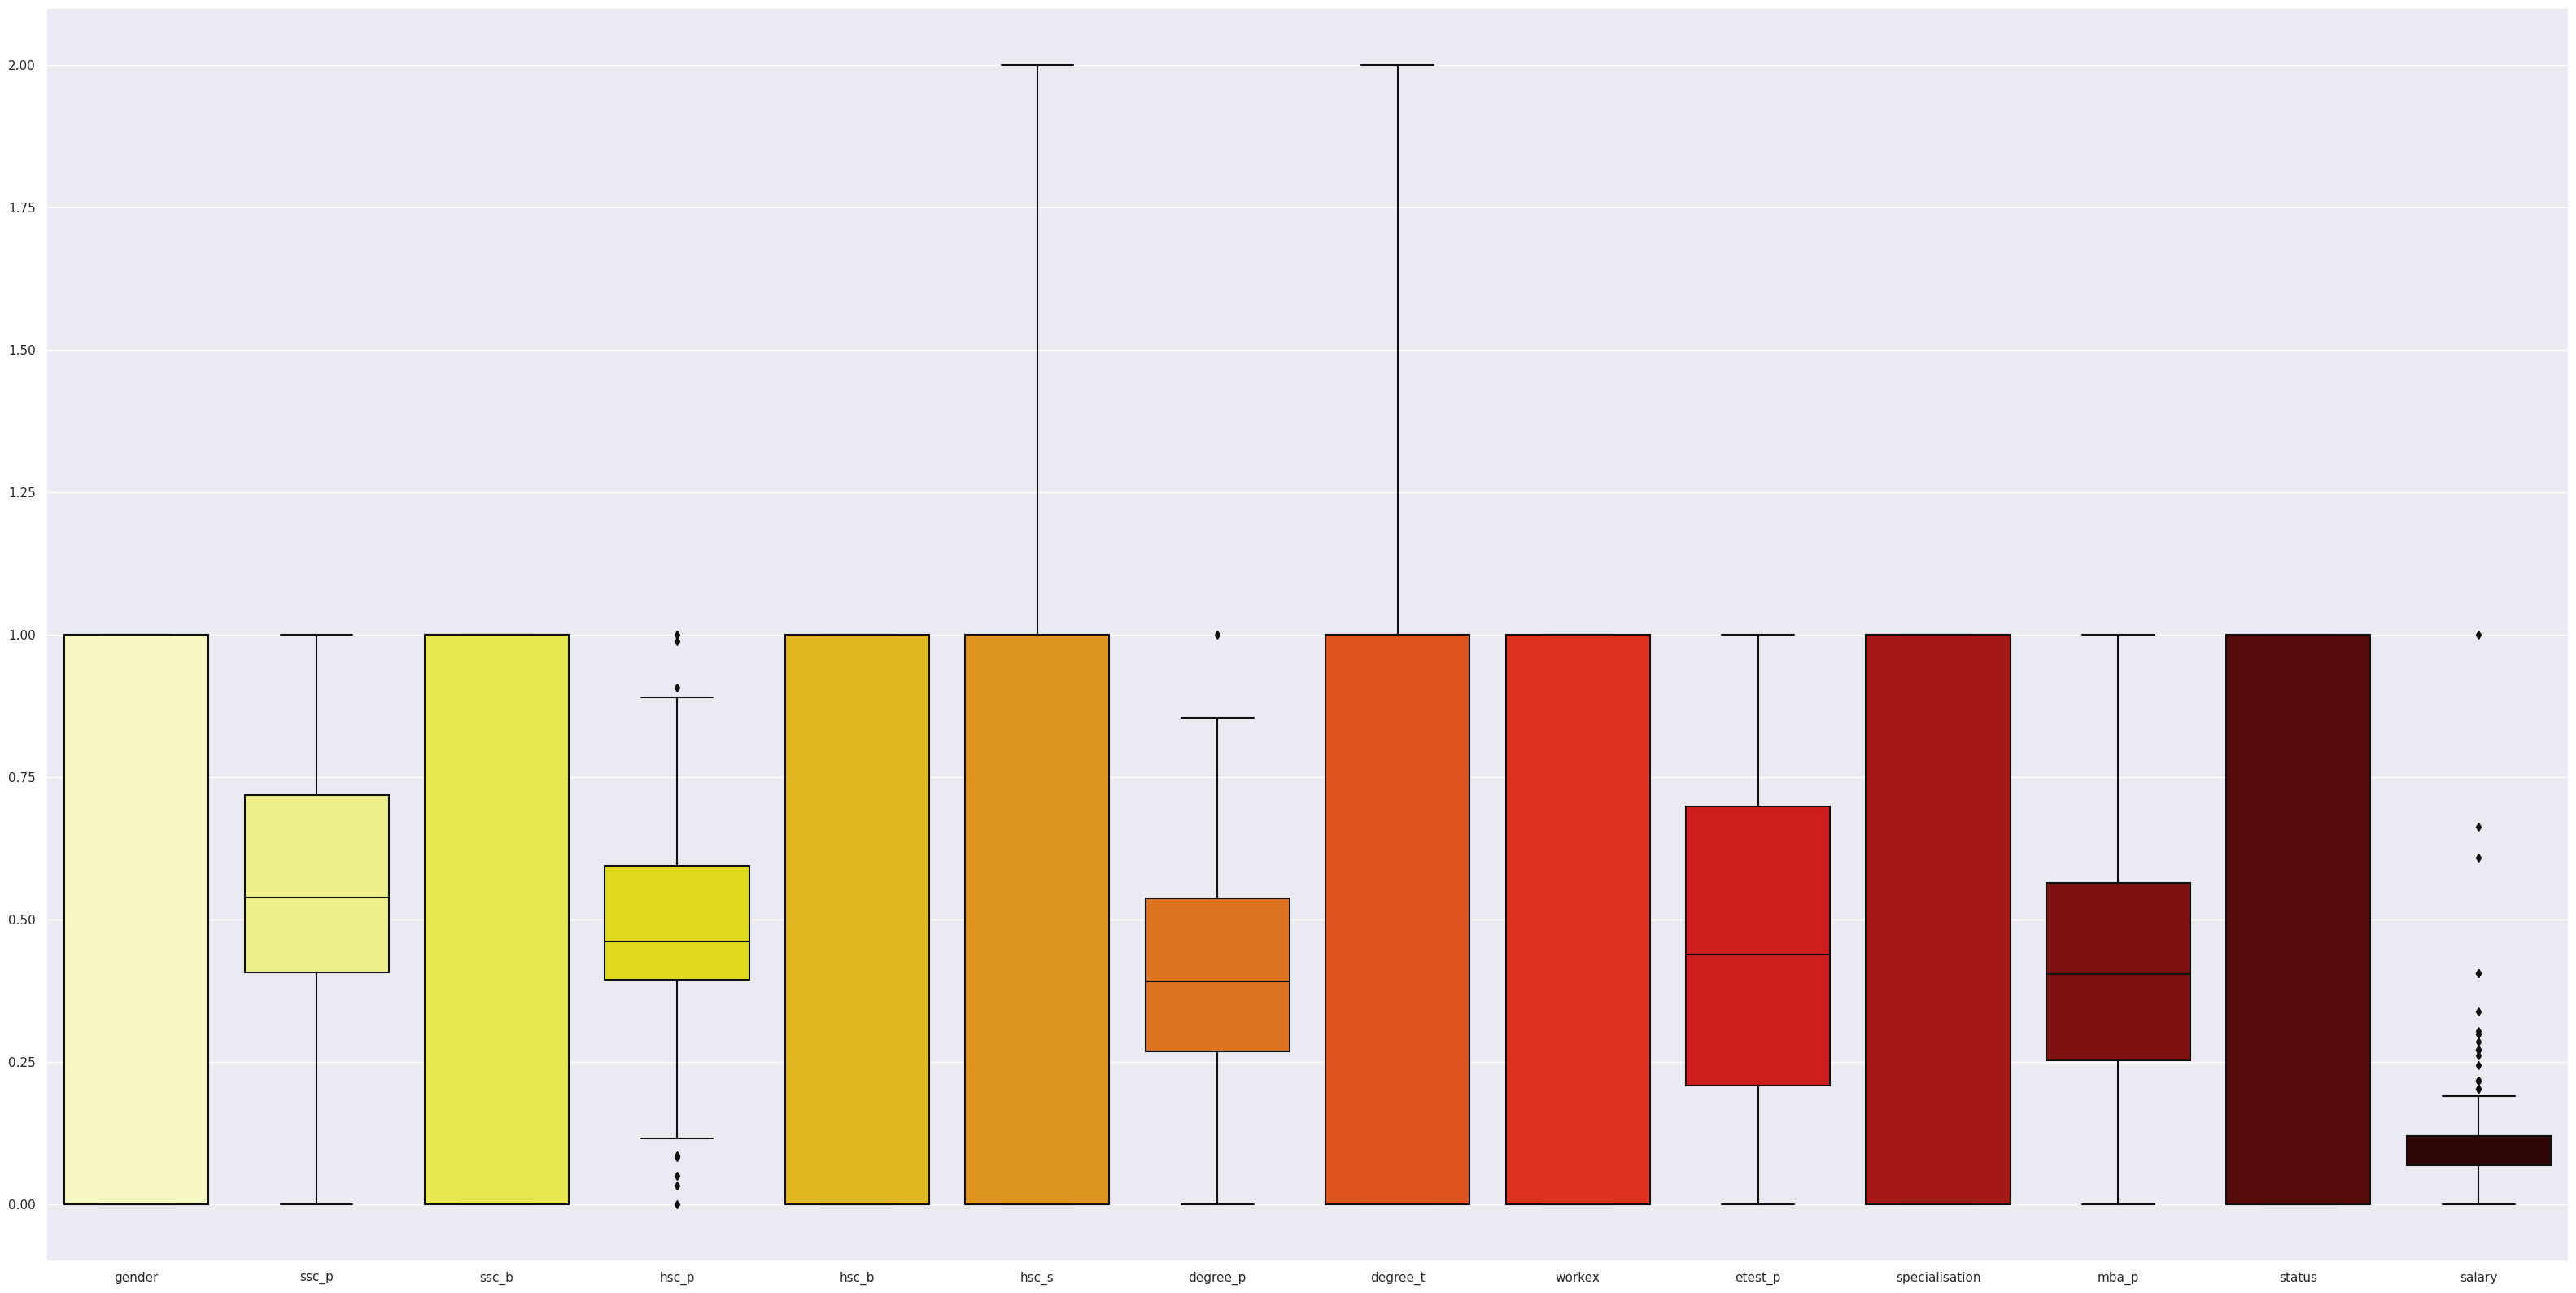

In [ ]:
fig, ax = plt.subplots(figsize=(40,20))

sns.set_style("darkgrid")
sns.set('notebook')
sns.boxplot(camp, palette='hot_r',ax=ax)
plt.show()

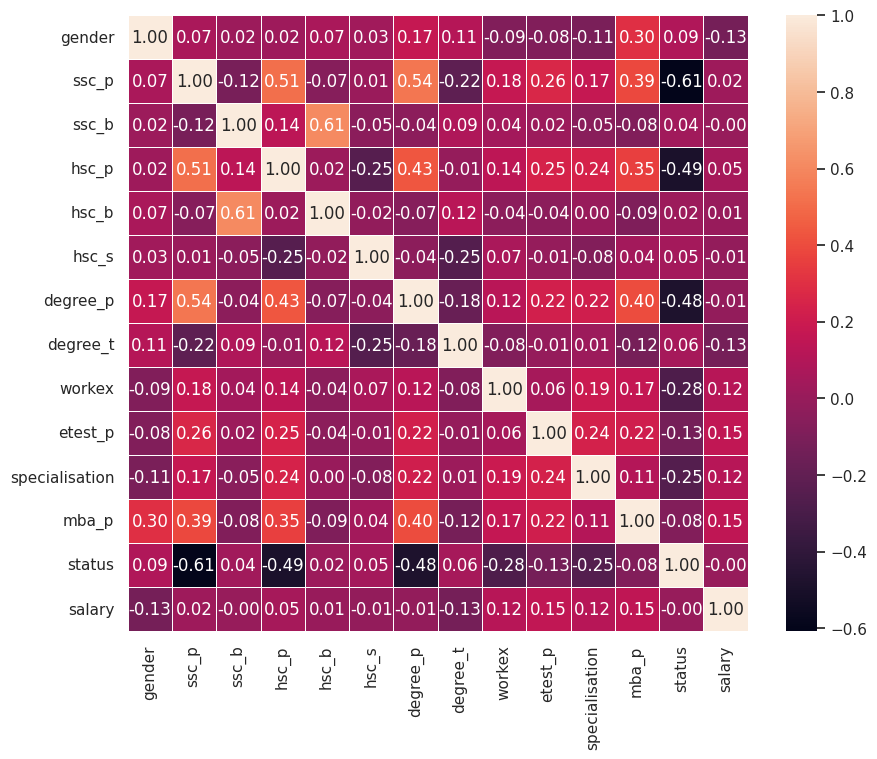

In [ ]:
corr_matrix = camp.corr()
fig , ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

<Axes: title={'center': 'Correlation with status'}>

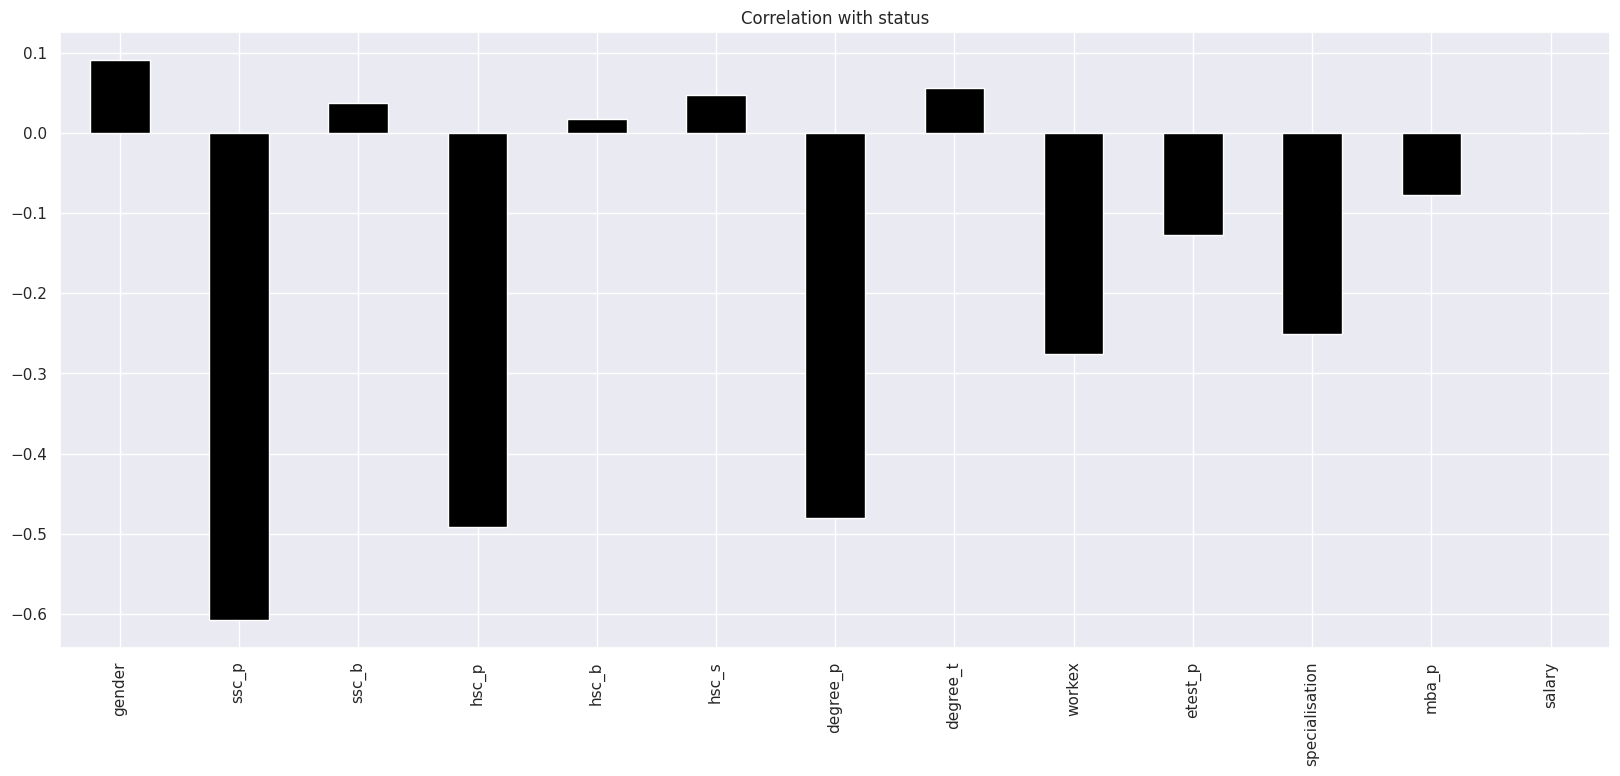

In [ ]:
camp.drop('status', axis=1).corrwith(camp['status']).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with status",color="Black")

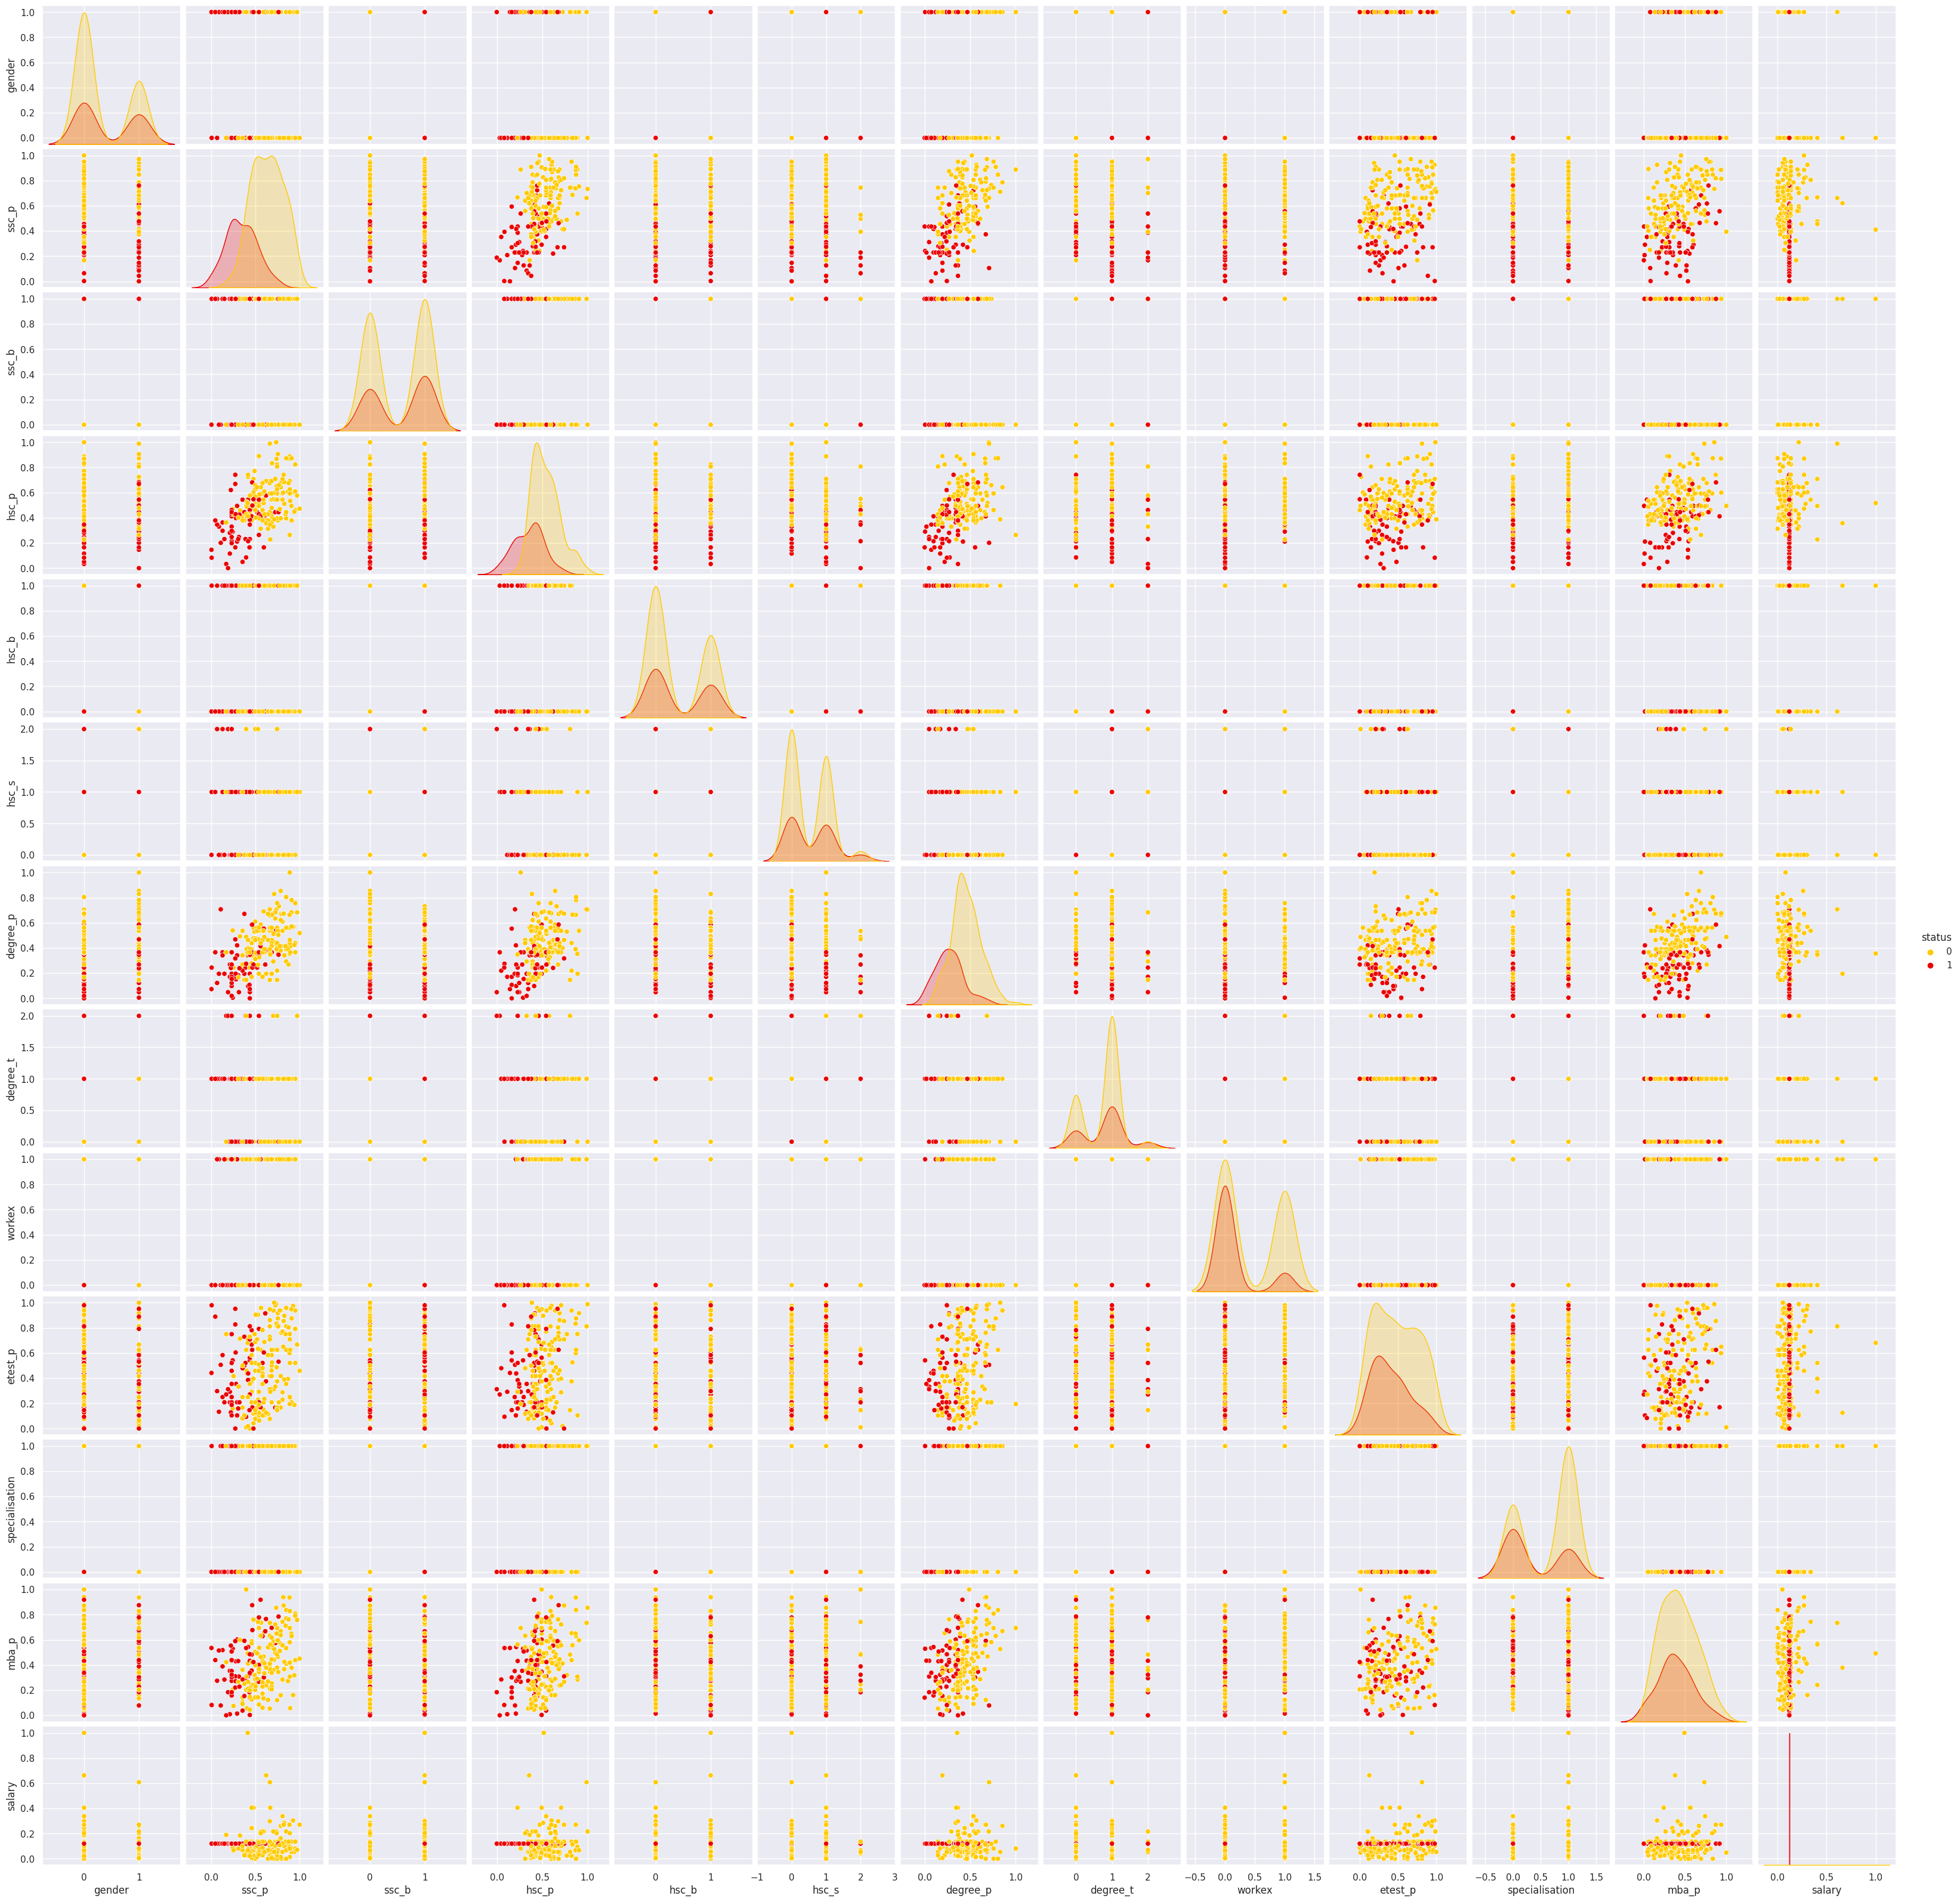

In [ ]:
sns.set_style("darkgrid")
sns.set('notebook')
sns.pairplot(camp, hue="status", palette='hot_r')
plt.show()

In [ ]:
camp

gender     ssc_p  ssc_b     hsc_p  hsc_b  hsc_s  degree_p  degree_t  \
0         0  0.538240      0  0.889621      0      0  0.195122         0   
1         0  0.792414      1  0.680890      0      1  0.670244         0   
2         0  0.497011      1  0.510708      1      2  0.341463         1   
3         0  0.311482      1  0.247117      1      1  0.048780         0   
4         0  0.925788      1  0.602965      1      0  0.568293         1   
..      ...       ...    ...       ...    ...    ...       ...       ...   
210       0  0.818594      0  0.741351      0      0  0.673171         1   
211       0  0.352711      0  0.378913      0      1  0.536585         0   
212       0  0.538240      0  0.494234      0      0  0.560976         1   
213       1  0.682540      0  0.477759      0      0  0.195122         1   
214       0  0.435168      1  0.345964      0      1  0.073171         1   

     workex   etest_p  specialisation     mba_p  status    salary  
0         0  0.104167               0  0.284483       0  0.094595  
1         1  0.760417               1  0.564843       0  0.000000  
2         0  0.520833               1  0.247001       0  0.067568  
3         0  0.333333               0  0.308096       1  0.119805  
4         0  0.975000               1  0.160795       0  0.304054  
..      ...       ...             ...       ...     ...       ...  
210       0  0.854167               1  0.872564       0  0.270270  
211       0  0.500000               1  0.090330       0  0.101351  
212       1  0.187500               1  0.693778       0  0.128378  
213       0  0.416667               0  0.338081       0  0.005405  
214       0  0.812500               0  0.337706       1  0.119805  

[215 rows x 14 columns]

### Dividing datatsest into different clustering units

In [ ]:
X = camp[['ssc_p','hsc_p']]
X = X.iloc[:,[0,1]].values
Y = camp[['degree_p','specialisation']]
Y = Y.iloc[:,[0,1]].values
Z = camp[['workex','degree_t']]
Z = Z.iloc[:,[0,1]].values
K = camp[['workex','specialisation']]
K = K.iloc[:,[0,1]].values
N = camp[['workex','degree_p']]
N = N.iloc[:,[0,1]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

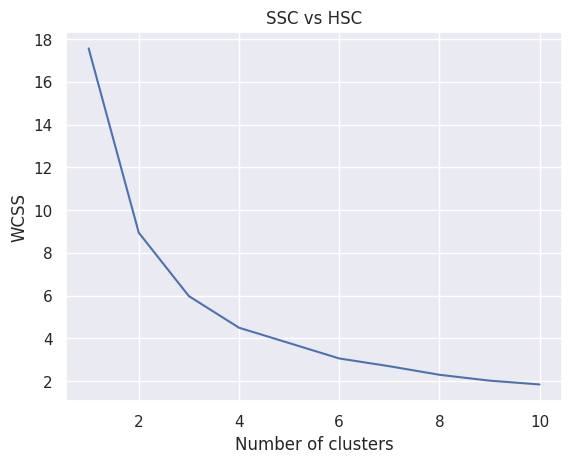

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('SSC vs HSC')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


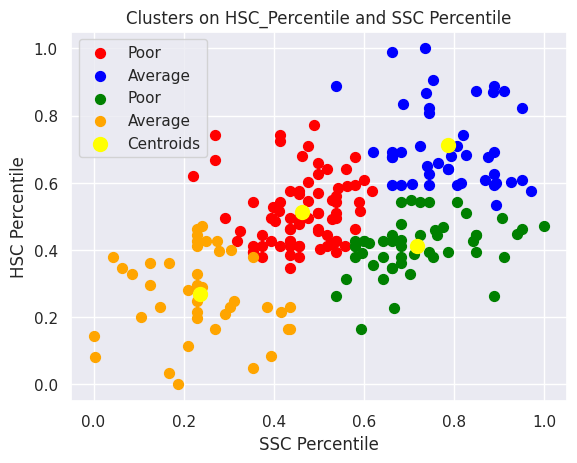

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans1 = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans1 == 0, 0], X[y_kmeans1 == 0, 1], s = 50, c = 'red', label = 'Poor')
plt.scatter(X[y_kmeans1 == 1, 0], X[y_kmeans1 == 1, 1], s = 50, c = 'blue', label = 'Average')
plt.scatter(X[y_kmeans1 == 2, 0], X[y_kmeans1 == 2, 1], s = 50, c = 'green', label = 'Poor')
plt.scatter(X[y_kmeans1 == 3, 0], X[y_kmeans1 == 3, 1], s = 50, c = 'orange', label = 'Average')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters on HSC_Percentile and SSC Percentile')
plt.xlabel('SSC Percentile')
plt.ylabel('HSC Percentile')
plt.legend()
plt.show()
y_kmeans1 = kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

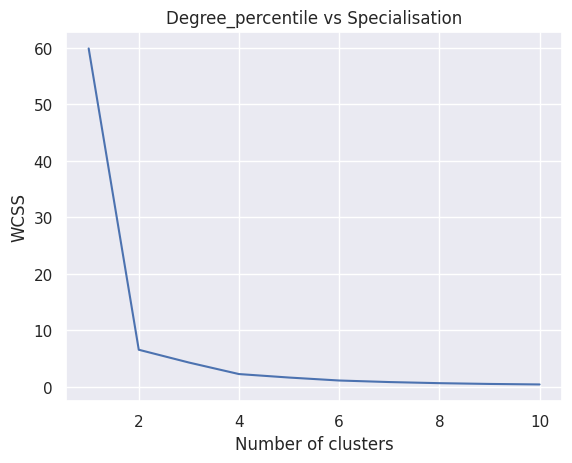

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Degree_percentile vs Specialisation')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


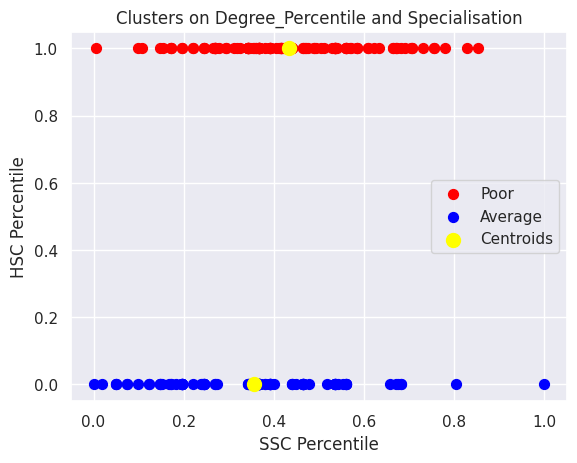

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans.fit_predict(Y)

plt.scatter(Y[y_kmeans2 == 0, 0], Y[y_kmeans2 == 0, 1], s = 50, c = 'red', label = 'Poor')
plt.scatter(Y[y_kmeans2 == 1, 0], Y[y_kmeans2 == 1, 1], s = 50, c = 'blue', label = 'Average')
# plt.scatter(Y[y_kmeans2 == 2, 0], Y[y_kmeans2 == 2, 1], s = 50, c = 'green', label = 'Poor')
# plt.scatter(Y[y_kmeans2 == 3, 0], Y[y_kmeans2 == 3, 1], s = 50, c = 'orange', label = 'Average')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters on Degree_Percentile and Specialisation')
plt.xlabel('SSC Percentile')
plt.ylabel('HSC Percentile')
plt.legend()
plt.show()
y_kmeans2 = kmeans.fit(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

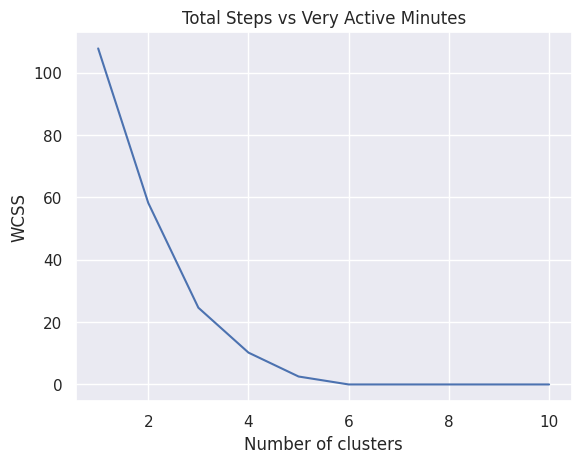

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Z)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Total Steps vs Very Active Minutes')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


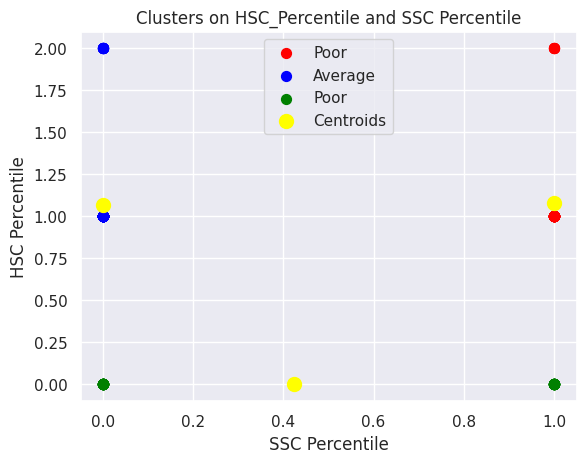

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans3 = kmeans.fit_predict(Z)

plt.scatter(Z[y_kmeans3 == 0, 0], Z[y_kmeans3 == 0, 1], s = 50, c = 'red', label = 'Poor')
plt.scatter(Z[y_kmeans3 == 1, 0], Z[y_kmeans3 == 1, 1], s = 50, c = 'blue', label = 'Average')
plt.scatter(Z[y_kmeans3 == 2, 0], Z[y_kmeans3 == 2, 1], s = 50, c = 'green', label = 'Poor')
# plt.scatter(Y[y_kmeans2 == 3, 0], Y[y_kmeans2 == 3, 1], s = 50, c = 'orange', label = 'Average')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters on HSC_Percentile and SSC Percentile')
plt.xlabel('SSC Percentile')
plt.ylabel('HSC Percentile')
plt.legend()
plt.show()
y_kmeans3 = kmeans.fit(Z)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

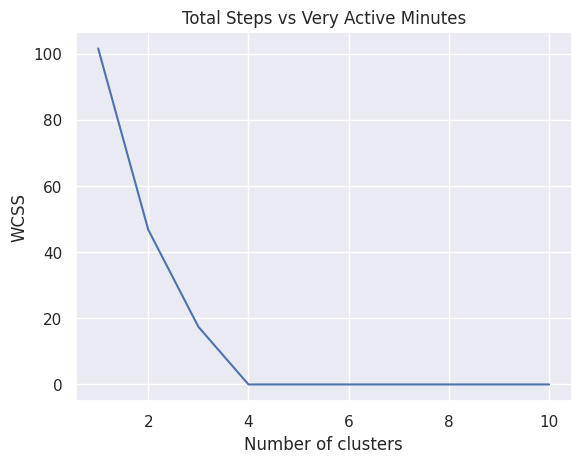

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(K)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Total Steps vs Very Active Minutes')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


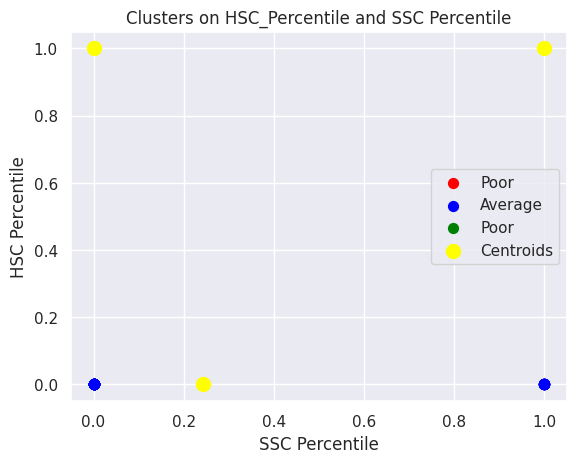

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans4 = kmeans.fit_predict(K)

plt.scatter(K[y_kmeans4 == 0, 0], K[y_kmeans4 == 0, 1], s = 50, c = 'red', label = 'Poor')
plt.scatter(K[y_kmeans4 == 1, 0], K[y_kmeans4 == 1, 1], s = 50, c = 'blue', label = 'Average')
plt.scatter(K[y_kmeans4 == 2, 0], K[y_kmeans4 == 2, 1], s = 50, c = 'green', label = 'Poor')
# plt.scatter(Y[y_kmeans2 == 3, 0], Y[y_kmeans2 == 3, 1], s = 50, c = 'orange', label = 'Average')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters on HSC_Percentile and SSC Percentile')
plt.xlabel('SSC Percentile')
plt.ylabel('HSC Percentile')
plt.legend()
plt.show()
y_kmeans4 = kmeans.fit(K)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

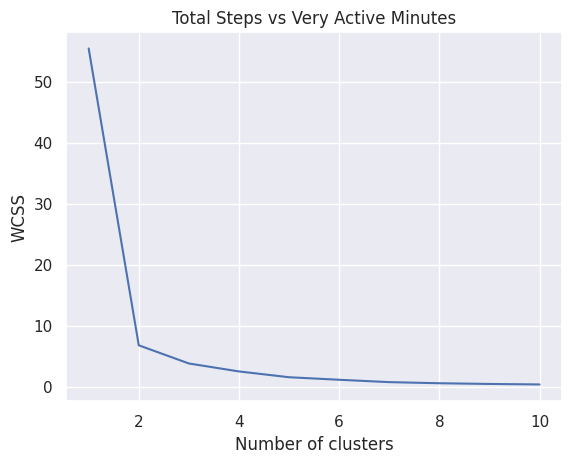

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(N)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Total Steps vs Very Active Minutes')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


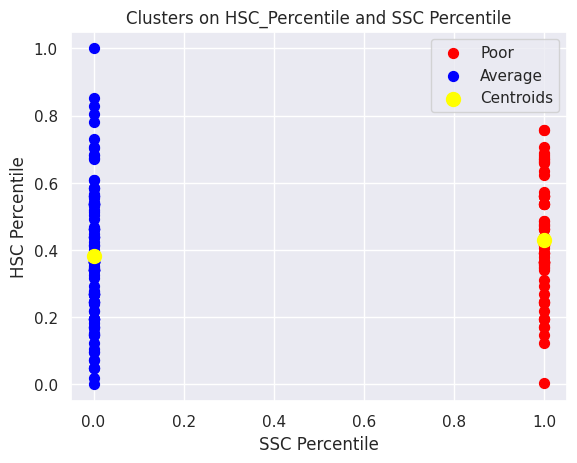

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans5 = kmeans.fit_predict(N)

plt.scatter(N[y_kmeans5 == 0, 0], N[y_kmeans5 == 0, 1], s = 50, c = 'red', label = 'Poor')
plt.scatter(N[y_kmeans5 == 1, 0], N[y_kmeans5 == 1, 1], s = 50, c = 'blue', label = 'Average')
# plt.scatter(N[y_kmeans5 == 2, 0], N[y_kmeans5 == 2, 1], s = 50, c = 'green', label = 'Poor')
# plt.scatter(Y[y_kmeans2 == 3, 0], Y[y_kmeans2 == 3, 1], s = 50, c = 'orange', label = 'Average')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters on HSC_Percentile and SSC Percentile')
plt.xlabel('SSC Percentile')
plt.ylabel('HSC Percentile')
plt.legend()
plt.show()
y_kmeans5 = kmeans.fit(N)

In [ ]:
lst = [y_kmeans1,y_kmeans2,y_kmeans3,y_kmeans4,y_kmeans5]

for i in range(0,len(lst)):
  pickle.dump(lst[i], open(f'y_kmeans{i+1}.pkl', 'wb'))

# Classification

In [ ]:
camp_place =  pd.read_csv('/content/Placement_Data_Full_Class.csv')
camp_place

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1     Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2    Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4    Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
..         ...    ...      ...            ...    ...         ...       ...  
210  Comm&Mgmt     No     91.0        Mkt&Fin  74.49      Placed  400000.0  
211   Sci&Tech     No     74.0        Mkt&Fin  53.62      Placed  275000.0  
212  Comm&Mgmt    Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
213  Comm&Mgmt     No     70.0         Mkt&HR  60.23      Placed  204000.0  
214  Comm&Mgmt     No     89.0         Mkt&HR  60.22  Not Placed       NaN  

[215 rows x 15 columns]

In [ ]:
camp.isna().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
camp_place.drop('salary',axis=1,inplace=True)

In [ ]:
X = camp_place.drop('status',axis=1)
Y = camp_place['status']

In [ ]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [ ]:
num_cols.pop()
num_cols

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']

In [ ]:
cols

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'specialisation', 'workex']

In [ ]:
X_train

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
147    148      M  70.00  Central  74.00  Central  Commerce     65.00   
161    162      M  55.60   Others  51.00   Others  Commerce     57.50   
169    170      M  59.96   Others  42.16   Others   Science     61.26   
131    132      F  74.90   Others  57.00   Others   Science     62.00   
27      28      M  63.00   Others  67.00   Others  Commerce     66.00   
..     ...    ...    ...      ...    ...      ...       ...       ...   
90      91      F  85.00   Others  90.00   Others  Commerce     82.00   
84      85      M  70.00  Central  63.00   Others   Science     70.00   
166    167      M  62.00   Others  62.00   Others  Commerce     60.00   
160    161      M  87.00  Central  74.00  Central   Science     65.00   
196    197      M  72.00   Others  63.00   Others   Science     77.50   

      degree_t workex  etest_p specialisation  mba_p  
147  Comm&Mgmt     No    83.00        Mkt&Fin  62.28  
161  Comm&Mgmt     No    57.63         Mkt&HR  62.72  
169   Sci&Tech     No    54.48         Mkt&HR  65.48  
131     Others    Yes    80.00        Mkt&Fin  60.78  
27   Comm&Mgmt     No    68.00         Mkt&HR  57.69  
..         ...    ...      ...            ...    ...  
90   Comm&Mgmt     No    92.00        Mkt&Fin  68.03  
84    Sci&Tech    Yes    55.00        Mkt&Fin  62.00  
166  Comm&Mgmt    Yes    63.00         Mkt&HR  52.38  
160   Sci&Tech    Yes    75.00         Mkt&HR  72.29  
196   Sci&Tech    Yes    78.00        Mkt&Fin  54.48  

[172 rows x 13 columns]

In [ ]:
Y_train.value_counts()

Placed        118
Not Placed     54
Name: status, dtype: int64

In [ ]:
Y_test.value_counts()

Placed        30
Not Placed    13
Name: status, dtype: int64

In [ ]:
Y_train

147        Placed
161    Not Placed
169    Not Placed
131        Placed
27         Placed
          ...    
90         Placed
84         Placed
166        Placed
160        Placed
196        Placed
Name: status, Length: 172, dtype: object

In [ ]:
ct_c = make_column_transformer(
    (MinMaxScaler(),num_cols),
    (OneHotEncoder(handle_unknown='ignore'),cols))

In [ ]:
ct_c.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['ssc_p', 'hsc_p', 'degree_p', 'etest_p',
                                  'mba_p']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ssc_b', 'hsc_b', 'hsc_s',
                                  'degree_t', 'specialisation', 'workex'])])

In [ ]:
X_train = ct_c.transform(X_train)
X_test = ct_c.transform(X_test)

In [ ]:
pickle.dump(ct_c, open('ct.pkl', 'wb'))

In [ ]:
Y_train.value_counts()

Placed        118
Not Placed     54
Name: status, dtype: int64

In [ ]:
Y_trains = []

for i in Y_train:
  if i =='Placed':
    Y_trains.append(1)
  else:
    Y_trains.append(0)

In [ ]:
Y_trains

[1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
Y_tests = []

for i in Y_test:
  if i =='Placed':
    Y_tests.append(1)
  else:
    Y_tests.append(0)

In [ ]:
# param_grid = {
#     'max_depth': range (2, 100, 10),
#     'n_estimators': range(60, 300, 40),
#     "gamma": [0, 0.25, 0.5, 1],
#     "reg_lambda": [0, 1, 5,10],
#     "scale_pos_weight": range(1,10,2),
#     "subsample": [0.1,0.4,0.6,0.8],
#     "colsample_bytree": [0.1,0.2,0.6,0.8],
# }

# # Init classifier
# xgb_cl = xgb.XGBClassifier(subsample= 0.8,
#  scale_pos_weight= 5,
#  reg_lambda= 1,
#  max_depth= 5,
#  learning_rate= 0.01,
#  gamma= 1,
#  colsample_bytree= 0.5)

# # Init Grid Search
# grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="accuracy",verbose=2)

# # Fit
# grid_cv.fit(X_train, Y_trains)

In [ ]:
# grid_cv.best_params_

In [ ]:
xgb_cl =  xgb.XGBClassifier(colsample_bytree = 0.8,
 gamma = 0,
 max_depth= 12,
 n_estimators= 60,
 reg_lambda = 0,
 scale_pos_weight = 3,
 subsample = 0.6)

xgb_cl.fit(X_train,Y_trains)
Y_preds = xgb_cl.predict(X_test)

In [ ]:
accuracy_score(Y_tests,Y_preds)

0.8604651162790697

In [ ]:
print(classification_report(Y_tests,Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.85      0.97      0.91        30

    accuracy                           0.86        43
   macro avg       0.87      0.79      0.82        43
weighted avg       0.86      0.86      0.85        43



In [ ]:
Y_train_pred = xgb_cl.predict(X_train)
accuracy_score(Y_trains,Y_train_pred)

1.0

In [ ]:
# %%time
# from sklearn.model_selection import RandomizedSearchCV

# #Different HyperParameters
# rf_grid = {"n_estimators": np.arange(10,100,10),
#           "max_depth": [None,3,5,10],
#           "min_samples_split":np.arange(2,10,2),
#           "min_samples_leaf":np.arange(1,10,2),
#           "max_features":[0.5,1,"sqrt",'log2']}

# #Instatantiate Randomised Search CV
# rs_model = GridSearchCV(RandomForestClassifier(n_jobs=-1,random_state=42),
#                              param_grid=rf_grid,
#                              cv=5,
#                              verbose=2,
#                         return_train_score=True)
# rs_model.fit(X_train,Y_trains)

In [ ]:
# rs_model.best_params_

In [ ]:
rf_cl=RandomForestClassifier(n_jobs=-1,random_state=42,
                       max_depth=5,
                       max_features='sqrt',
                       min_samples_leaf=3,
                       min_samples_split=2,
                       n_estimators=20)
rf_cl.fit(X_train,Y_trains)
Y_preds = rf_cl.predict(X_test)

In [ ]:
accuracy_score(Y_tests,Y_preds)

0.8604651162790697

In [ ]:
print(classification_report(Y_tests,Y_preds))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.85      0.97      0.91        30

    accuracy                           0.86        43
   macro avg       0.87      0.79      0.82        43
weighted avg       0.86      0.86      0.85        43



In [ ]:
Y_train_pred = xgb_cl.predict(X_train)
accuracy_score(Y_trains,Y_train_pred)

1.0

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,Y_trains)

LogisticRegression()

In [ ]:
Y_preds = lr.predict(X_test)
accuracy_score(Y_tests,Y_preds)

0.8604651162790697

In [ ]:
Y_train_pred = xgb_cl.predict(X_train)
accuracy_score(Y_trains,Y_train_pred)

1.0

In [ ]:
import tensorflow as tf
# Set Random seed
tf.random.set_seed(42)
X_train = tf.constant(X_train)
Y_trains = tf.constant(Y_trains)
#1. Create the Model
model_1_c = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#2. Compile the Model
model_1_c.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr  = 0.001),
                metrics=['accuracy'])

#3. Fit the Model
history = model_1_c.fit(X_train,Y_trains,epochs=100)

Epoch 1/100
6/6 [==============================] - 8s 5ms/step - loss: 0.7335 - accuracy: 0.3081
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7149 - accuracy: 0.3372
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7025 - accuracy: 0.4070
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5291
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5930
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6864 - accuracy: 0.6221
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.6337
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6823 - accuracy: 0.6744
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6807 - accuracy: 0.6919
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.7093
Epoch 11/100
6/6 [===========

In [ ]:
tf_pred = model_1_c.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
Y_preds_round=tf.round(tf_pred)

In [ ]:
accuracy_score(Y_preds_round,Y_tests)

0.6744186046511628

In [ ]:
Y_tests

[0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0]

In [ ]:
Y_preds_round

<tf.Tensor: shape=(43, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)>

In [ ]:
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.5)
def plot_confusion(y_test,y_preds):
    #Creating Heatmap of Confusion matrix"
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

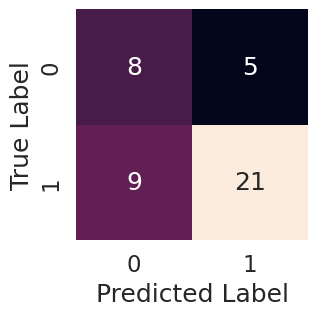

In [ ]:
plot_confusion(Y_tests,Y_preds_round)

In [ ]:
print(classification_report(Y_preds_round,Y_tests))

              precision    recall  f1-score   support

         0.0       0.62      0.47      0.53        17
         1.0       0.70      0.81      0.75        26

    accuracy                           0.67        43
   macro avg       0.66      0.64      0.64        43
weighted avg       0.67      0.67      0.66        43



In [ ]:
import tensorflow as tf
# Set Random seed
tf.random.set_seed(42)
X_train = tf.constant(X_train)
Y_trains = tf.constant(Y_trains)
#1. Create the Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

#2. Compile the Model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr  = 0.01),
                metrics=['accuracy'])

#3. Fit the Model
history = model_2.fit(X_train,Y_trains,epochs=100)

Epoch 1/100
6/6 [==============================] - 3s 5ms/step - loss: 0.6983 - accuracy: 0.5523
Epoch 2/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6496 - accuracy: 0.6860
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6283 - accuracy: 0.6860
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6120 - accuracy: 0.6860
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6046 - accuracy: 0.6860
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5742 - accuracy: 0.6977
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5446 - accuracy: 0.7151
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5153 - accuracy: 0.7326
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4851 - accuracy: 0.7558
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 0.4612 - accuracy: 0.7965
Epoch 11/100
6/6 [===========

2/2 [==============================] - 0s 6ms/step


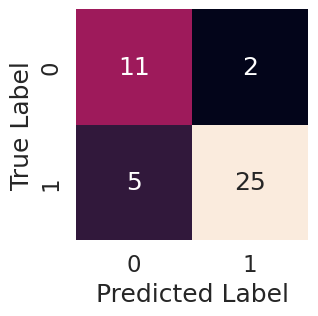

In [ ]:
tf_pred2 = model_2.predict(X_test)
Y_preds_round2=tf.round(tf_pred2)
plot_confusion(Y_tests,Y_preds_round2)

In [ ]:
accuracy_score(Y_preds_round2,Y_tests)

0.8372093023255814

In [ ]:
print(classification_report(Y_preds_round2,Y_tests))

              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76        16
         1.0       0.83      0.93      0.88        27

    accuracy                           0.84        43
   macro avg       0.84      0.81      0.82        43
weighted avg       0.84      0.84      0.83        43



In [ ]:
model_1_c.save('mba_classification.h5')

# Regression

In [ ]:
camp = pd.read_csv('/content/Placement_Data_Full_Class.csv')

In [ ]:
num_cols = []
obj_cols = []

for i in camp.columns:
    if camp[f'{i}'].dtype == 'float64':
      num_cols.append(i)
    if camp[f'{i}'].dtype == 'O':
      obj_cols.append(i)

In [ ]:
camp_copy = copy.deepcopy(camp)
for i in obj_cols:
  par_cols = list(camp[i].unique())
  camp_copy,len_enc=One_Hot(camp_copy,i,par_cols)
  camp_copy= col_trans(camp_copy,par_cols,len_enc)

In [ ]:
camp_copy

sl_no  ssc_p  hsc_p  degree_p  etest_p  mba_p    salary    M    F  \
0        1  67.00  91.00     58.00     55.0  58.80  270000.0  0.0  1.0   
1        2  79.33  78.33     77.48     86.5  66.28  200000.0  0.0  1.0   
2        3  65.00  68.00     64.00     75.0  57.80  250000.0  0.0  1.0   
3        4  56.00  52.00     52.00     66.0  59.43       NaN  0.0  1.0   
4        5  85.80  73.60     73.30     96.8  55.50  425000.0  0.0  1.0   
..     ...    ...    ...       ...      ...    ...       ...  ...  ...   
210    211  80.60  82.00     77.60     91.0  74.49  400000.0  0.0  1.0   
211    212  58.00  60.00     72.00     74.0  53.62  275000.0  0.0  1.0   
212    213  67.00  67.00     73.00     59.0  69.72  295000.0  0.0  1.0   
213    214  74.00  66.00     58.00     70.0  60.23  204000.0  1.0  0.0   
214    215  62.00  58.00     53.00     89.0  60.22       NaN  0.0  1.0   

     Others  ...  Arts  Sci&Tech  Comm&Mgmt  Others   No  Yes  Mkt&HR  \
0       0.0  ...   0.0       0.0        0.0     1.0  1.0  0.0     0.0   
1       1.0  ...   1.0       0.0        0.0     1.0  0.0  1.0     1.0   
2       1.0  ...   0.0       1.0        0.0     0.0  1.0  0.0     1.0   
3       1.0  ...   1.0       0.0        0.0     1.0  1.0  0.0     0.0   
4       1.0  ...   0.0       1.0        0.0     0.0  1.0  0.0     1.0   
..      ...  ...   ...       ...        ...     ...  ...  ...     ...   
210     0.0  ...   0.0       1.0        0.0     0.0  1.0  0.0     1.0   
211     0.0  ...   1.0       0.0        0.0     1.0  1.0  0.0     1.0   
212     0.0  ...   0.0       1.0        0.0     0.0  0.0  1.0     1.0   
213     0.0  ...   0.0       1.0        0.0     0.0  1.0  0.0     0.0   
214     1.0  ...   1.0       1.0        0.0     0.0  1.0  0.0     0.0   

     Mkt&Fin  Placed  Not Placed  
0        1.0     0.0         1.0  
1        0.0     0.0         1.0  
2        0.0     0.0         1.0  
3        1.0     1.0         0.0  
4        0.0     0.0         1.0  
..       ...     ...         ...  
210      0.0     0.0         1.0  
211      0.0     0.0         1.0  
212      0.0     0.0         1.0  
213      1.0     0.0         1.0  
214      1.0     1.0         0.0  

[215 rows x 25 columns]

In [ ]:
for i in num_cols:
  camp_copy_placed[i] = Scaler.fit_transform(np.array(camp_copy_placed[i]).reshape(-1,1))

<Axes: title={'center': 'Correlation with status'}>

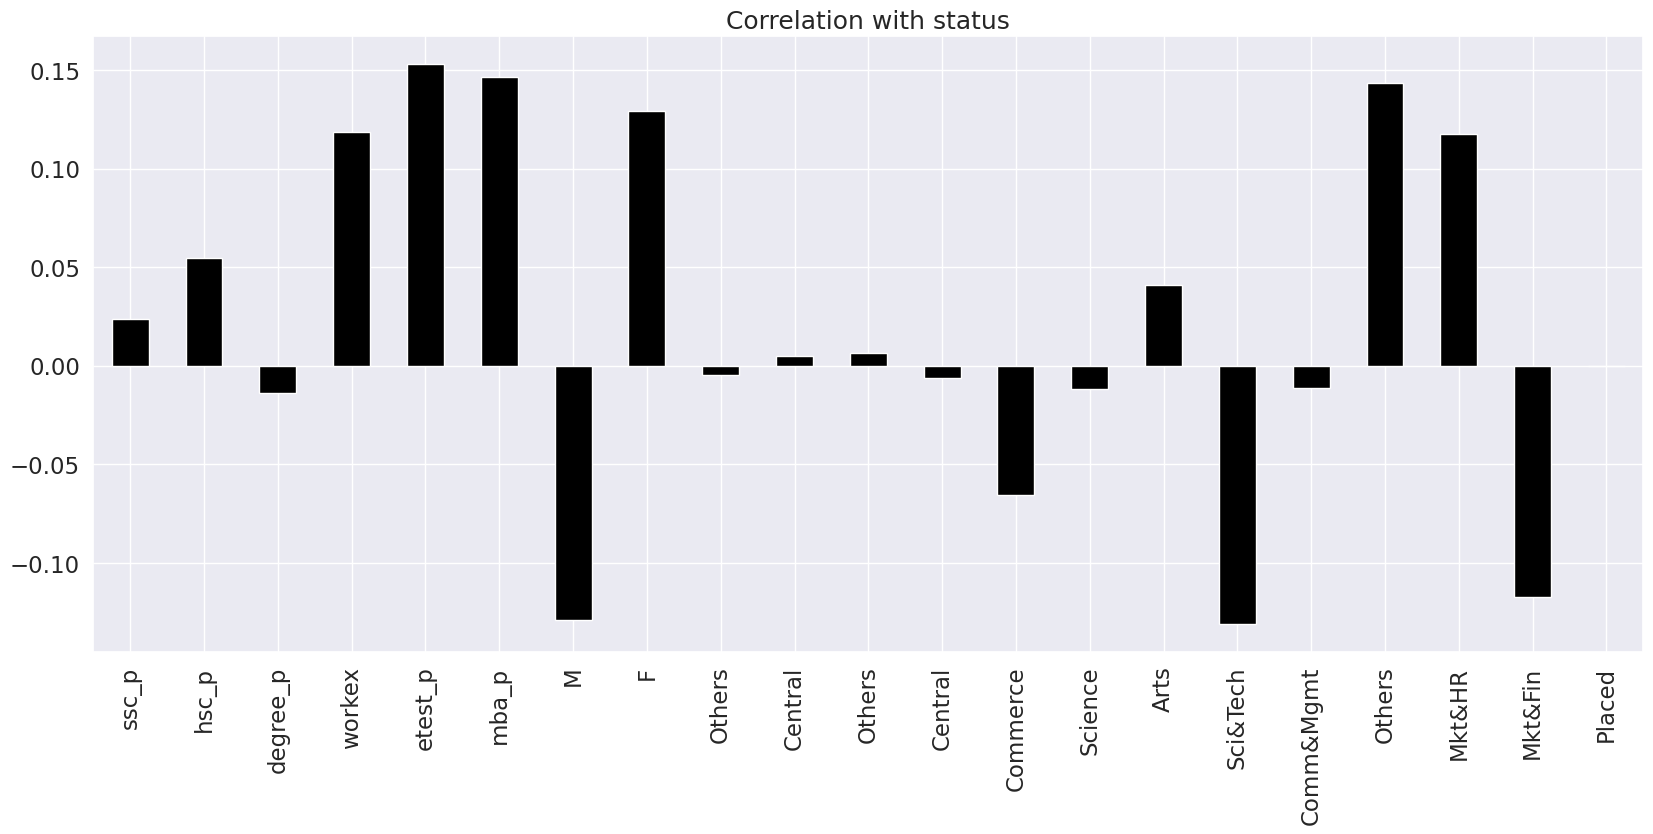

In [ ]:
camp_copy_placed.drop('salary', axis=1).corrwith(camp_copy_placed.salary).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with status",color="Black")

In [ ]:
camp

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1     Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2    Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3     Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4    Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0  
..         ...    ...      ...            ...    ...         ...       ...  
210  Comm&Mgmt     No     91.0        Mkt&Fin  74.49      Placed  400000.0  
211   Sci&Tech     No     74.0        Mkt&Fin  53.62      Placed  275000.0  
212  Comm&Mgmt    Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
213  Comm&Mgmt     No     70.0         Mkt&HR  60.23      Placed  204000.0  
214  Comm&Mgmt     No     89.0         Mkt&HR  60.22  Not Placed       NaN  

[215 rows x 15 columns]

In [ ]:
X = camp.drop('status',axis=1)
X = camp.drop('salary',axis=1)
Y = camp['salary']

In [ ]:
Y.fillna(0,inplace=True)

In [ ]:
Y.isna().sum()

0

In [ ]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
obj_cols.pop()

'status'

In [ ]:
num_cols.pop()

'salary'

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(),num_cols),
    (OneHotEncoder(handle_unknown='ignore'),obj_cols))

In [ ]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['ssc_p', 'hsc_p', 'degree_p', 'etest_p',
                                  'mba_p']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ssc_b', 'hsc_b', 'hsc_s',
                                  'degree_t', 'workex', 'specialisation'])])

In [ ]:
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [ ]:
# # Create the parameter grid based on the results of random search
# param_grid = {
#     'bootstrap': [True,False],
#     'max_depth': range(60,300,60),
#     'max_features': range(1,5,2),
#     'min_samples_leaf': range(1,6,2),
#     'min_samples_split': range(1,20,2),
#     'n_estimators': range(100,1001,200)
# }
# # Create a based model
# rf = RandomForestRegressor()
# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
#                           cv = 3, n_jobs = -1, verbose = 2)

# grid_search.fit(X_train,Y_train)

In [ ]:
# grid_search.best_params_

In [ ]:
# {'bootstrap': True,
#  'max_depth': 60,
#  'max_features': 3,
#  'min_samples_leaf': 1,
#  'min_samples_split': 7,
#  'n_estimators': 100}

In [ ]:
rf_reg = RandomForestRegressor(bootstrap= True,
                            max_depth= 60,
                            max_features= 3,
                            min_samples_leaf= 1,
                            min_samples_split= 7,
                            n_estimators= 100)

rf_reg.fit(X_train,Y_train)

RandomForestRegressor(max_depth=60, max_features=3, min_samples_split=7)

In [ ]:
def rmsle(y_test,y_preds):
    """Calculates Root Mean Squared Log Error, basically Mean Squared Log Error is ratio of true and pred whic defines the ratio
    by which the predicted value Deflected from the True Value"""

    return np.sqrt(mean_squared_log_error(y_test,y_preds))


In [ ]:
#Create Function to evalute model on few different Levels
def show_scores(model,x_train,y_train,x_valid,y_valid):
    model.fit(x_train,y_train)
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_valid)
    scores = {"Training MAE :":mean_absolute_error(y_train,train_preds),
             "Valid MAE :":mean_absolute_error(y_valid,val_preds),
             "Training RMSLE :":rmsle(y_train,train_preds),
             "Valid RMSLE :":rmsle(y_valid,val_preds),
             "Trainig R^2 :":r2_score(y_train, train_preds),
             "Valid R^2 :":r2_score(y_valid, val_preds)}

    return scores

In [ ]:
show_scores(rf_reg,X_train,Y_train,X_test,Y_test)

{'Training MAE :': 57764.19525231761,
 'Valid MAE :': 93598.08036472573,
 'Training RMSLE :': 6.233886352614051,
 'Valid RMSLE :': 6.2548057271032755,
 'Trainig R^2 :': 0.7247810116576252,
 'Valid R^2 :': 0.25684514340572895}

In [ ]:
X_train.shape

(172, 21)

In [ ]:
Y_train

93          0.0
84     300000.0
95     420000.0
137    225000.0
210    400000.0
         ...   
106         0.0
14          0.0
92     230000.0
179         0.0
102    300000.0
Name: salary, Length: 172, dtype: float64

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(21,activation='relu'),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(60,activation='relu'),
    tf.keras.layers.Dense(90,activation='relu'),
    tf.keras.layers.Dense(100,activation='softsign'),
    tf.keras.layers.Dense(100,activation='tanh'),
    tf.keras.layers.Dense(90,activation='relu'),
    tf.keras.layers.Dense(60,activation='relu'),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

#Fit the Model
history_1=model_1.fit(X_train, Y_train, epochs=200)

Epoch 1/200
6/6 [==============================] - 4s 7ms/step - loss: 197209.2812 - mae: 197209.2812
Epoch 2/200
6/6 [==============================] - 0s 5ms/step - loss: 197209.1562 - mae: 197209.1562
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 197208.8125 - mae: 197208.8125
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 197208.0938 - mae: 197208.0938
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 197206.7656 - mae: 197206.7656
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 197204.4844 - mae: 197204.4844
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 197201.4688 - mae: 197201.4688
Epoch 8/200
6/6 [==============================] - 0s 6ms/step - loss: 197197.4219 - mae: 197197.4219
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 197191.6250 - mae: 197191.6250
Epoch 10/200
6/6 [==============================] - 0s 8ms/step - loss: 197183.812

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(21,),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(60,),
    tf.keras.layers.Dense(90,activation='relu'),
    tf.keras.layers.Dense(100,activation='softsign'),
    tf.keras.layers.Dense(100,activation='tanh'),
    tf.keras.layers.Dense(90,),
    tf.keras.layers.Dense(60,activation='relu'),
    tf.keras.layers.Dense(30,),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0010),
    metrics=['mae']
)

#Fit the Model
history_2=model_2.fit(X_train, Y_train, epochs=200)

Epoch 1/200
6/6 [==============================] - 3s 9ms/step - loss: 197208.5156 - mae: 197208.5156
Epoch 2/200
6/6 [==============================] - 0s 7ms/step - loss: 197205.5312 - mae: 197205.5312
Epoch 3/200
6/6 [==============================] - 0s 7ms/step - loss: 197199.0156 - mae: 197199.0156
Epoch 4/200
6/6 [==============================] - 0s 7ms/step - loss: 197188.7656 - mae: 197188.7656
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 197172.1406 - mae: 197172.1406
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 197138.3750 - mae: 197138.3750
Epoch 7/200
6/6 [==============================] - 0s 7ms/step - loss: 197087.7969 - mae: 197087.7969
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 197010.9531 - mae: 197010.9531
Epoch 9/200
6/6 [==============================] - 0s 7ms/step - loss: 196904.6250 - mae: 196904.6250
Epoch 10/200
6/6 [==============================] - 0s 9ms/step - loss: 196750.140

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(21,),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(21),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0010),
    metrics=['mae']
)

#Fit the Model
history_2=model_2.fit(X_train, Y_train, epochs=200)

Epoch 1/200
6/6 [==============================] - 2s 5ms/step - loss: 197208.6562 - mae: 197208.6562
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 197207.3281 - mae: 197207.3281
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 197205.2031 - mae: 197205.2031
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 197202.1406 - mae: 197202.1406
Epoch 5/200
6/6 [==============================] - 0s 4ms/step - loss: 197196.8906 - mae: 197196.8906
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 197187.0000 - mae: 197187.0000
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 197170.2344 - mae: 197170.2344
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 197144.3750 - mae: 197144.3750
Epoch 9/200
6/6 [==============================] - 0s 5ms/step - loss: 197101.5781 - mae: 197101.5781
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 197035.343

In [ ]:
scaler = MinMaxScaler()
scaler.fit(np.array(Y_train).reshape(-1,1))

MinMaxScaler()

In [ ]:
Y_train = scaler.transform(np.array(Y_train).reshape(-1,1))

In [ ]:
Y_train

array([[0.        ],
       [0.31914894],
       [0.44680851],
       [0.2393617 ],
       [0.42553191],
       [0.23404255],
       [0.30319149],
       [0.25531915],
       [0.25531915],
       [0.38297872],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.25106383],
       [0.29255319],
       [0.        ],
       [0.27659574],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.25531915],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.31914894],
       [0.37234043],
       [0.        ],
       [0.        ],
       [0.40425532],
       [0.24787234],
       [0.        ],
       [0.26595745],
       [0.        ],
       [0.24468085],
       [0.        ],
       [0.31914894],
       [0.28723404],
       [0.26595745],
       [0.25531915],
       [0.31914894],
       [0.29787234],
       [0.37234043],
       [0.265

In [ ]:
Y_train=tf.squeeze(tf.constant(Y_train))

In [ ]:
#Set Random Seed
tf.random.set_seed(42)

#Create the model
model_3_R = tf.keras.Sequential([
    tf.keras.layers.Dense(21,),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(21),
    tf.keras.layers.Dense(1)
])

#Compile the Model
model_3_R.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0010),
    metrics=['mae']
)

#Fit the Model
history_3=model_3_R.fit(X_train, Y_train, epochs=200)

Epoch 1/200
6/6 [==============================] - 2s 5ms/step - loss: 0.4671 - mae: 0.4671
Epoch 2/200
6/6 [==============================] - 0s 4ms/step - loss: 0.2042 - mae: 0.2042
Epoch 3/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1534 - mae: 0.1534
Epoch 4/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1427 - mae: 0.1427
Epoch 5/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1316 - mae: 0.1316
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 0.1207 - mae: 0.1207
Epoch 7/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1004 - mae: 0.1004
Epoch 8/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0949 - mae: 0.0949
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0939 - mae: 0.0939
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 0.1028 - mae: 0.1028
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss: 0.0890 

In [ ]:
model_3_R.save('salary.h5')

In [ ]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ct, open('ct_r.pkl', 'wb'))

In [ ]:
Y = scaler.inverse_transform(np.array(Y_train).reshape(-1,1))
Y

array([[     0.],
       [300000.],
       [420000.],
       [225000.],
       [400000.],
       [220000.],
       [285000.],
       [240000.],
       [240000.],
       [360000.],
       [     0.],
       [     0.],
       [     0.],
       [236000.],
       [275000.],
       [     0.],
       [260000.],
       [     0.],
       [     0.],
       [     0.],
       [240000.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [     0.],
       [300000.],
       [350000.],
       [     0.],
       [     0.],
       [380000.],
       [233000.],
       [     0.],
       [250000.],
       [     0.],
       [230000.],
       [     0.],
       [300000.],
       [270000.],
       [250000.],
       [240000.],
       [300000.],
       [280000.],
       [350000.],
       [250000.],
       [500000.],
       [     0.],
       [204000.],
       [216000.],
       [300000.],
       [400000.],
       [     0.],
       [  

In [ ]:
Y =tf.constant(5)
Y=np.array(Y)
Y = scaler.inverse_transform(np.array(Y).reshape(-1,1))
Y

array([[4700000.]])